



# **Traffic Time Series Forecasting**

---







## TSA MiniProject Phase - 1
---
###   Akash Upadhyay - 60009220182




##Load libraries and data files, file structure and content

In [ ]:
import numpy as np
import pandas as pd
pd.set_option("display.max_columns", 500)
pd.set_option("display.max_rows", 500)
import matplotlib.pyplot as plt
import math

%matplotlib inline


In [ ]:
data = pd.read_csv('/content/traffic.csv')
data.head()

,DateTime,Junction,Vehicles,ID
0,2015-11-01 00:00:00,1,15,20151101001
1,2015-11-01 01:00:00,1,13,20151101011
2,2015-11-01 02:00:00,1,10,20151101021
3,2015-11-01 03:00:00,1,7,20151101031
4,2015-11-01 04:00:00,1,9,20151101041


##Sorting Data by Time

In [ ]:
import pandas as pd

data['DateTime'] = pd.to_datetime(data['DateTime'], format='%Y-%m-%d %H:%M:%S')

data = data.sort_values(by='DateTime').reset_index(drop=True)


In [ ]:
data.head()

,DateTime,Junction,Vehicles,ID
0,2015-11-01 00:00:00,1,15,20151101001
1,2015-11-01 00:00:00,2,6,20151101002
2,2015-11-01 00:00:00,3,9,20151101003
3,2015-11-01 01:00:00,3,7,20151101013
4,2015-11-01 01:00:00,1,13,20151101011


## **PreProcessing**

In [ ]:
data.isnull().sum()

,0
DateTime,0
Junction,0
Vehicles,0
ID,0


## Generate Lag Features

In [ ]:
data['Vehicles'] = data['Vehicles'].shift(1)

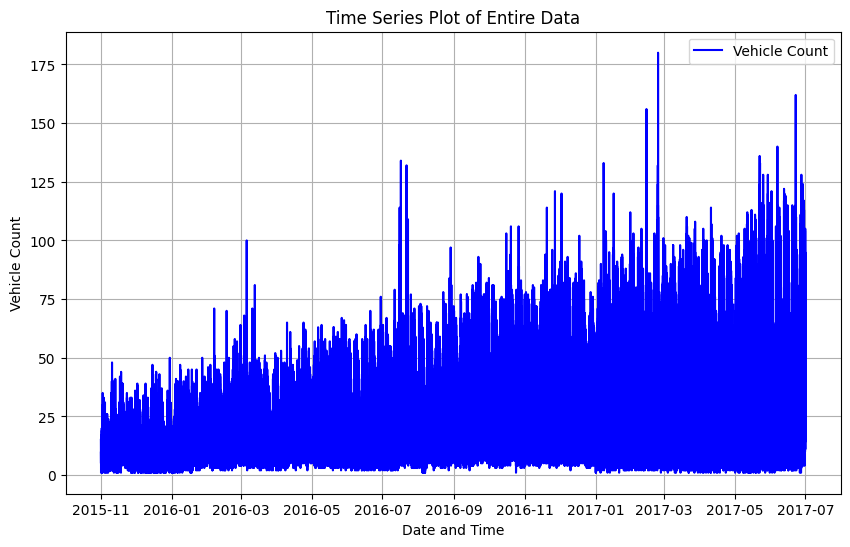

In [ ]:
plt.figure(figsize=(10, 6))

plt.plot(data['DateTime'], data['Vehicles'], label='Vehicle Count', color='b')

plt.title('Time Series Plot of Entire Data')
plt.xlabel('Date and Time')
plt.ylabel('Vehicle Count')

plt.legend()
plt.grid(True)

plt.show()

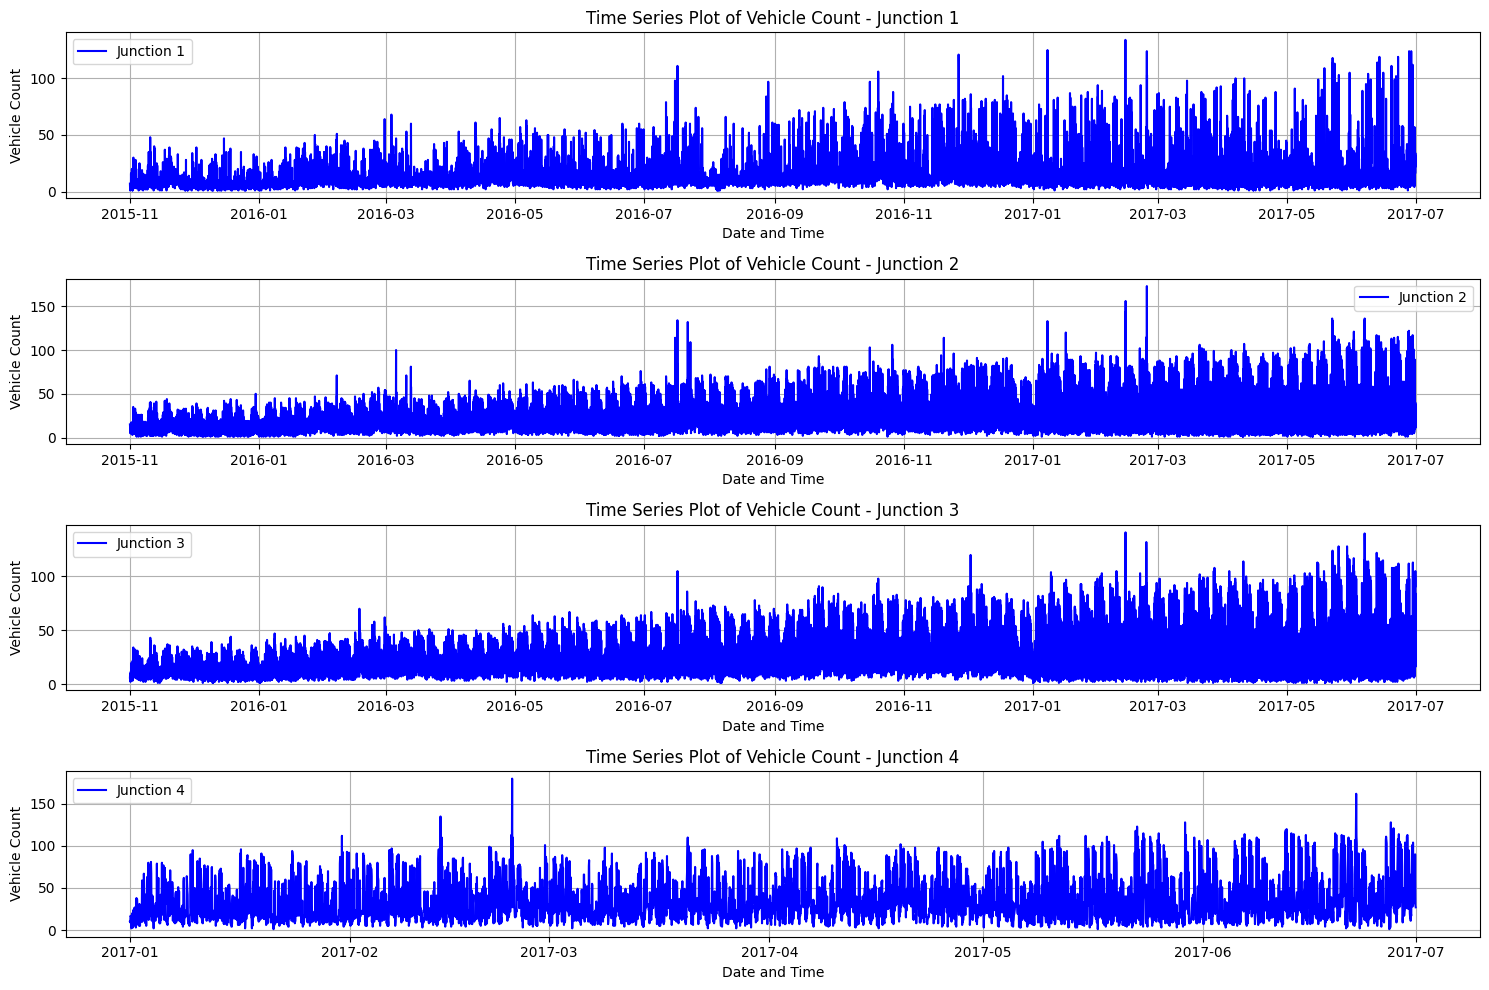

In [ ]:
junctions = data['Junction'].unique()
num_junctions = len(junctions)

plt.figure(figsize=(15, 10))

for i, junction in enumerate(junctions):
    plt.subplot(num_junctions, 1, i + 1)
    junction_data = data[data['Junction'] == junction]
    plt.plot(junction_data['DateTime'], junction_data['Vehicles'], label=f'Junction {junction}', color='b')
    plt.title(f'Time Series Plot of Vehicle Count - Junction {junction}')
    plt.xlabel('Date and Time')
    plt.ylabel('Vehicle Count')
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()

## Stationary Check

In [ ]:
import numpy as np
import pandas as pd
from statsmodels.tsa.stattools import adfuller

print("Missing values:", data['Vehicles'].isnull().sum())
print("Infinite values:", np.isinf(data['Vehicles']).sum())

data = data.replace([np.inf, -np.inf], np.nan)
data = data.dropna(subset=['Vehicles'])

# Augmented Dickey-Fuller test
result = adfuller(data['Vehicles'])
print(f'p-value: {result[1]}')
print(f'ADF Statistic: {result[0]}')
print(f'Critical Values:')
for key, value in result[4].items():
    print(f'   {key}: {value}')


Missing values: 1
Infinite values: 0
p-value: 3.08890752415737e-28
ADF Statistic: -15.414866361033935
Critical Values:
   1%: -3.4304860697717245
   5%: -2.8616001399911304
   10%: -2.5668020105375784


###Data is Not Stationary

In [ ]:
data['Vehicle_diff'] = data['Vehicles'].diff(1)  # First difference

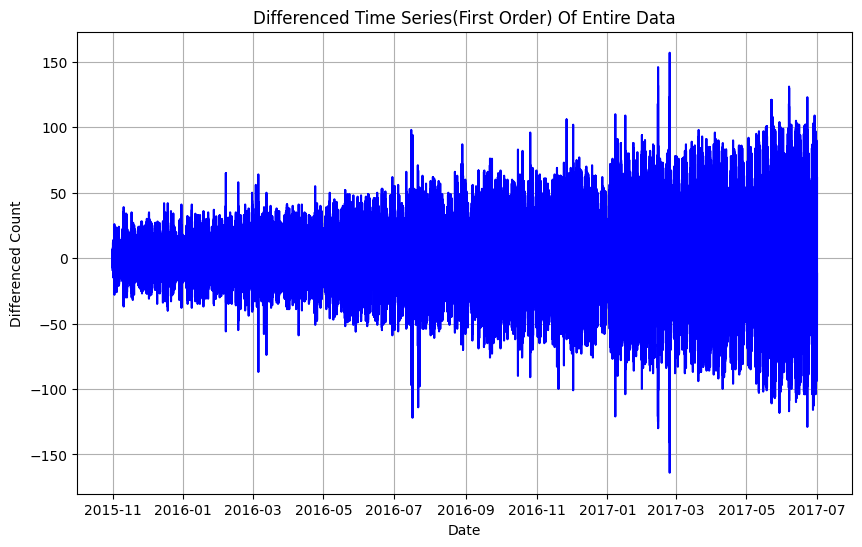

In [ ]:
stationary_data = data.dropna(subset=['Vehicle_diff'])

plt.figure(figsize=(10, 6))
plt.plot(stationary_data['DateTime'], stationary_data['Vehicle_diff'], color='blue')
plt.title('Differenced Time Series(First Order) Of Entire Data')
plt.xlabel('Date')
plt.ylabel('Differenced Count')
plt.grid(True)
plt.show()


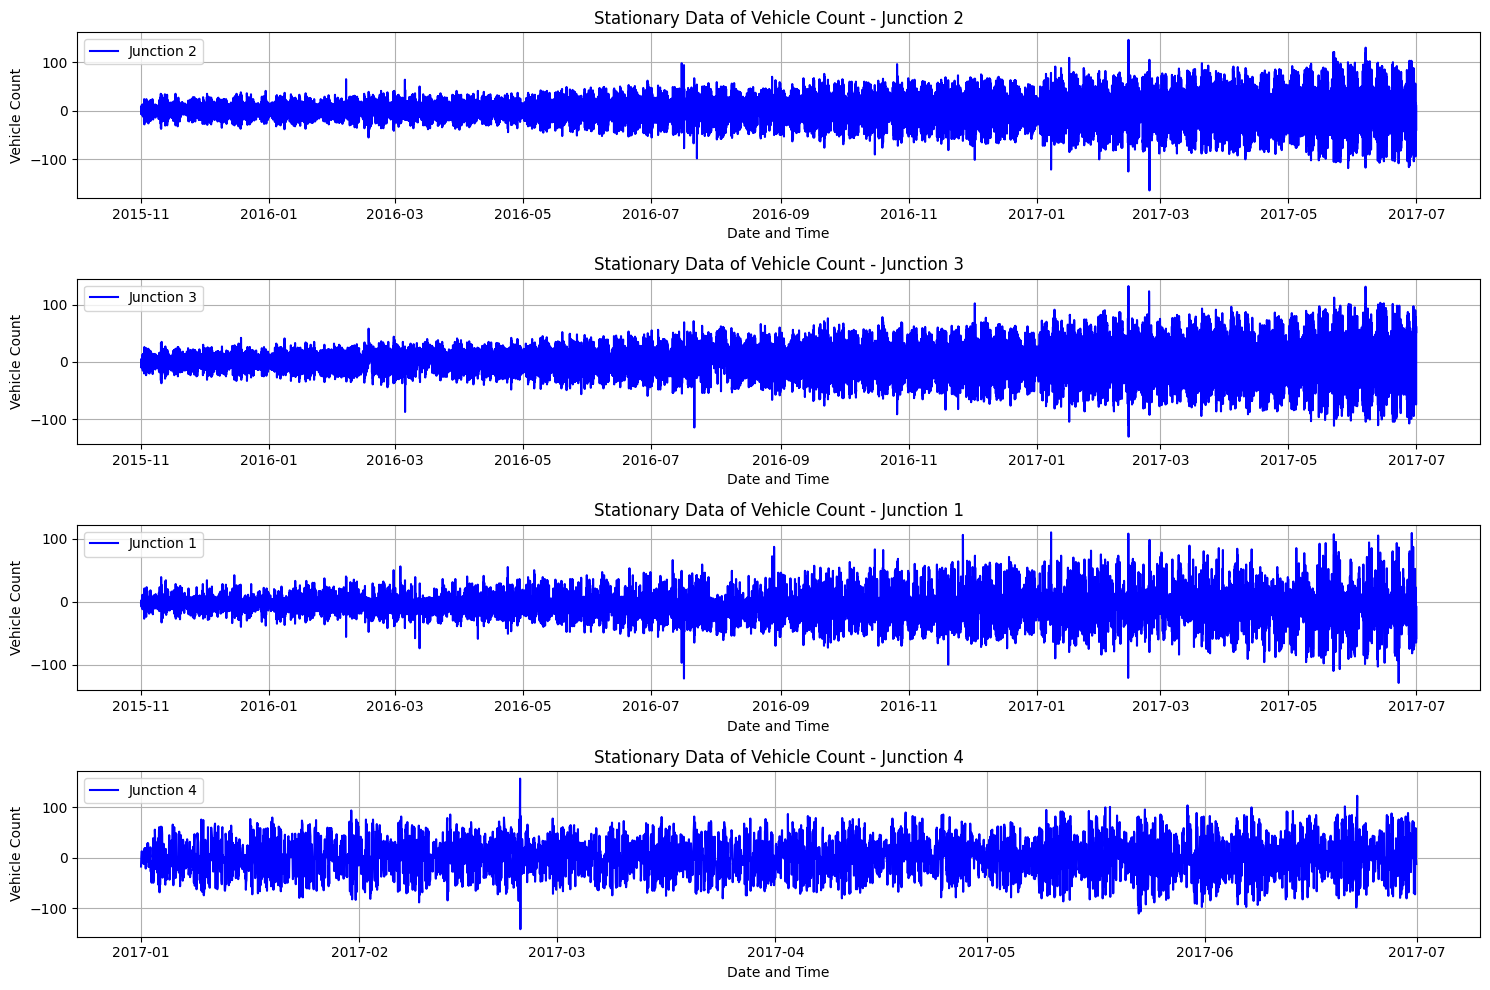

In [ ]:
junctions = data['Junction'].unique()
num_junctions = len(junctions)

plt.figure(figsize=(15, 10))

for i, junction in enumerate(junctions):
    plt.subplot(num_junctions, 1, i + 1)
    junction_data = data[data['Junction'] == junction]
    plt.plot(junction_data['DateTime'], junction_data['Vehicle_diff'], label=f'Junction {junction}', color='b')
    plt.title(f'Stationary Data of Vehicle Count - Junction {junction}')
    plt.xlabel('Date and Time')
    plt.ylabel('Vehicle Count')
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()

In [ ]:
in import numpy as np
import pandas as pd
from statsmodels.tsa.stattools import adfuller

print("Missing values:", data['Vehicle_diff'].isnull().sum())
print("Infinite values:", np.isinf(data['Vehicle_diff']).sum())

data = data.replace([np.inf, -np.inf], np.nan)
data = data.dropna(subset=['Vehicle_diff'])

# Augmented Dickey-Fuller test
result = adfuller(data['Vehicle_diff'])
print(f'p-value: {result[1]}')
print(f'ADF Statistic: {result[0]}')
print(f'Critical Values:')
for key, value in result[4].items():
    print(f'   {key}: {value}')

Missing values: 1
Infinite values: 0
p-value: 0.0
ADF Statistic: -52.49965268615044
Critical Values:
   1%: -3.4304860726031237
   5%: -2.861600141242521
   10%: -2.5668020112036576


###Data is Stationary Now

## **ACF AND PACF**

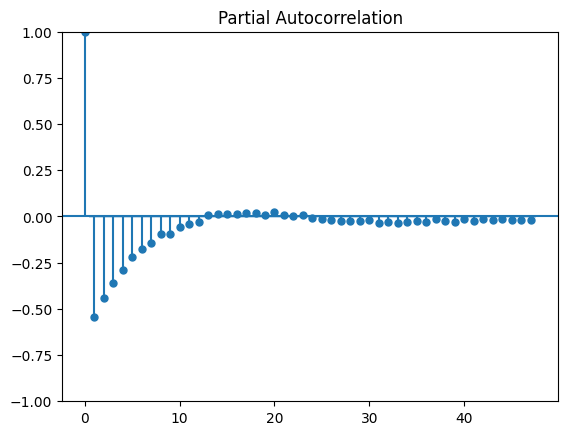

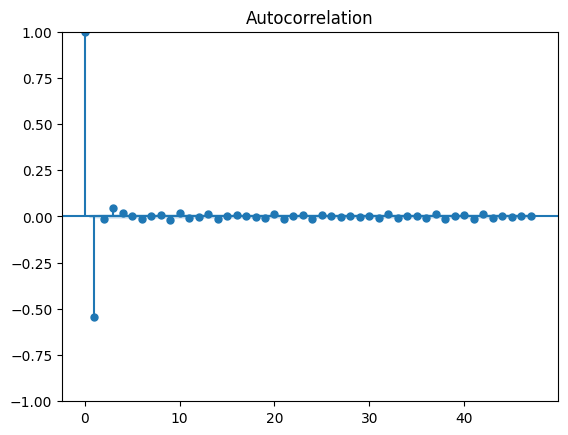

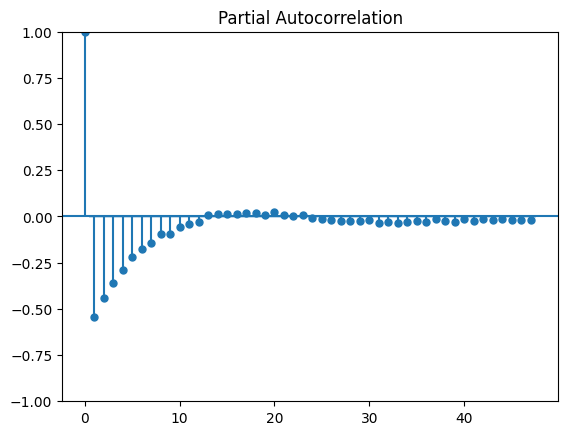

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(data['Vehicle_diff'])
plot_pacf(data['Vehicle_diff'])

In this set of ACF and PACF plots:


*   ACF Plot: The ACF plot shows an immediate drop to near zero after lag 1, with
no significant autocorrelation in further lags. This pattern suggests that the series could be a moving average (MA) process.
*   PACF Plot: The PACF plot has a significant spike at lag 1, followed by a sharp drop, and then shows no significant spikes at higher lags. This pattern is characteristic of a MA(1) process, where only the first lag of the error term is significant.

Suggested Model:

Based on these observations, an MA(1) or ARIMA(0,1,1) model  would be a suitable starting point.

>  MA(1) or ARIMA(0,1,1)





## **ARIMA (0,1,1)**

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as s

                               SARIMAX Results                                
Dep. Variable:           Vehicle_diff   No. Observations:                48118
Model:                 ARIMA(0, 1, 1)   Log Likelihood             -230996.010
Date:                Sat, 16 Nov 2024   AIC                         461996.020
Time:                        12:07:12   BIC                         462013.582
Sample:                             0   HQIC                        462001.531
                              - 48118                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.9997      0.005   -187.134      0.000      -1.010      -0.989
sigma2       865.5832      6.614    130.873      0.000     852.620     878.546
Ljung-Box (L1) (Q):               14332.60   Jarque-

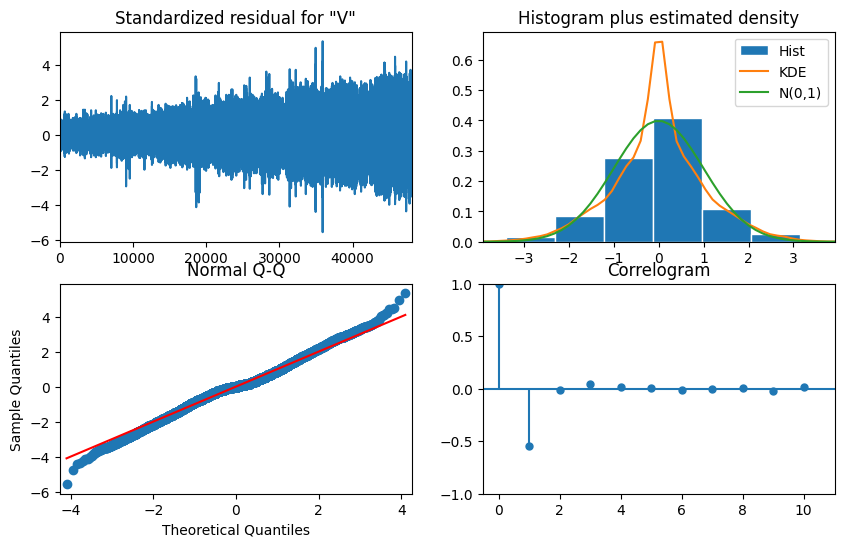

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(data['Vehicle_diff'], order=(0, 1, 1))
model_fit = model.fit()

print(model_fit.summary())
model_fit.plot_diagnostics(figsize=(10, 6))
plt.show()


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:               Vehicles   No. Observations:                48118
Model:                 ARIMA(0, 1, 1)   Log Likelihood             -211582.205
Date:                Sat, 16 Nov 2024   AIC                         423168.411
Time:                        12:07:16   BIC                         423185.973
Sample:                             0   HQIC                        423173.922
                              - 48118                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.9384      0.002   -601.750      0.000      -0.941      -0.935
sigma2       386.2941      1.859    207.743      0.000     382.650     389.939
Ljung-Box (L1) (Q):                1767.55   Jarque-

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
<ipython-input-16-572b96c2b9a1>:17: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  forecast_index = pd.date_range(start=last_date + pd.Timedelta(hours=1), periods=forecast_steps, freq='H')


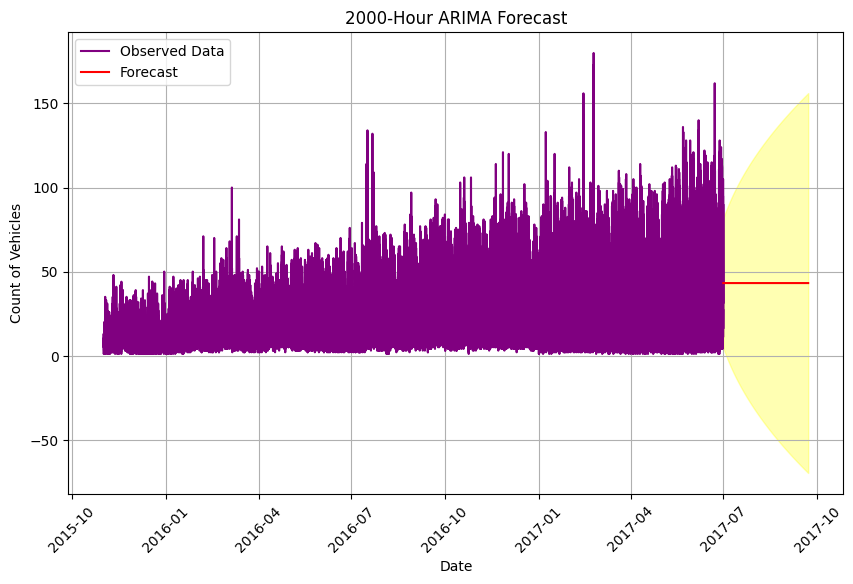

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
import pandas as pd

arima_model = ARIMA(data['Vehicles'].dropna(), order=(0, 1, 1))
arima_fit = arima_model.fit()

print(arima_fit.summary())

# Forecasting into the future
forecast_steps = 2000
forecast = arima_fit.get_forecast(steps=forecast_steps)

forecast_ci = forecast.conf_int()

last_date = data['DateTime'].iloc[-1]
forecast_index = pd.date_range(start=last_date + pd.Timedelta(hours=1), periods=forecast_steps, freq='H')

plt.figure(figsize=(10, 6))
plt.plot(data['DateTime'], data['Vehicles'], label='Observed Data', color='purple')
plt.plot(forecast_index, forecast.predicted_mean, label='Forecast', color='red')
plt.fill_between(forecast_index,
                 forecast_ci.iloc[:, 0],
                 forecast_ci.iloc[:, 1], color='yellow', alpha=0.3)
plt.title(f'{forecast_steps}-Hour ARIMA Forecast')
plt.xlabel('Date')
plt.ylabel('Count of Vehicles')
plt.legend()
plt.grid()
plt.xticks(rotation=45)
plt.show()


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)


ARIMA Summary for Junction 3:
                                SARIMAX Results                                
Dep. Variable:               Vehicles   No. Observations:                14592
Model:                 ARIMA(0, 1, 1)   Log Likelihood              -64623.989
Date:                Sat, 16 Nov 2024   AIC                         129251.978
Time:                        12:07:18   BIC                         129267.154
Sample:                             0   HQIC                        129257.020
                              - 14592                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.9332      0.002   -379.341      0.000      -0.938      -0.928
sigma2       411.5487      3.735    110.200      0.000     404.229     418.868
Ljung-Box (L1) (Q):  

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
<ipython-input-17-b7ce9adb066a>:22: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  forecast_index = pd.date_range(start=last_date + pd.Timedelta(hours=1), periods=forecast_steps, freq='H')


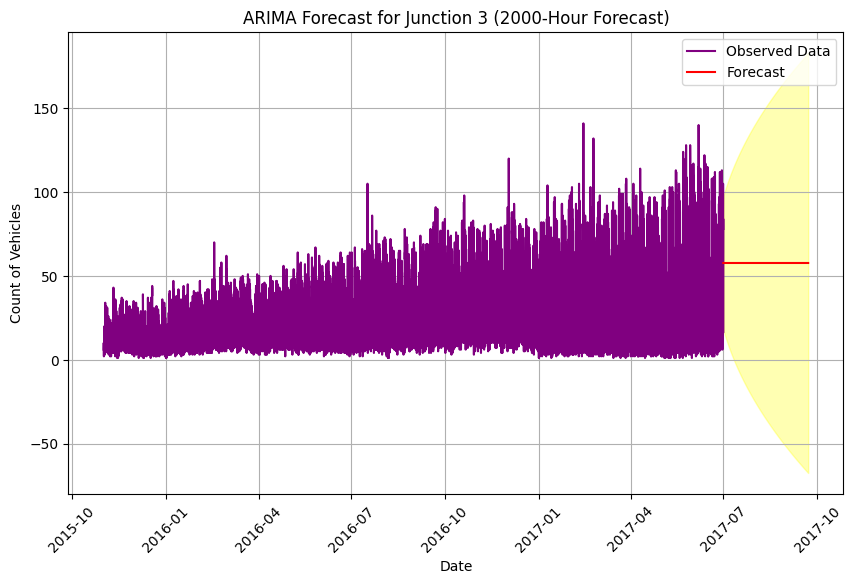

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)


ARIMA Summary for Junction 1:
                                SARIMAX Results                                
Dep. Variable:               Vehicles   No. Observations:                14591
Model:                 ARIMA(0, 1, 1)   Log Likelihood              -57349.548
Date:                Sat, 16 Nov 2024   AIC                         114703.096
Time:                        12:07:21   BIC                         114718.272
Sample:                             0   HQIC                        114708.138
                              - 14591                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.9599      0.002   -471.058      0.000      -0.964      -0.956
sigma2       151.9313      0.649    234.040      0.000     150.659     153.204
Ljung-Box (L1) (Q):  

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
<ipython-input-17-b7ce9adb066a>:22: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  forecast_index = pd.date_range(start=last_date + pd.Timedelta(hours=1), periods=forecast_steps, freq='H')


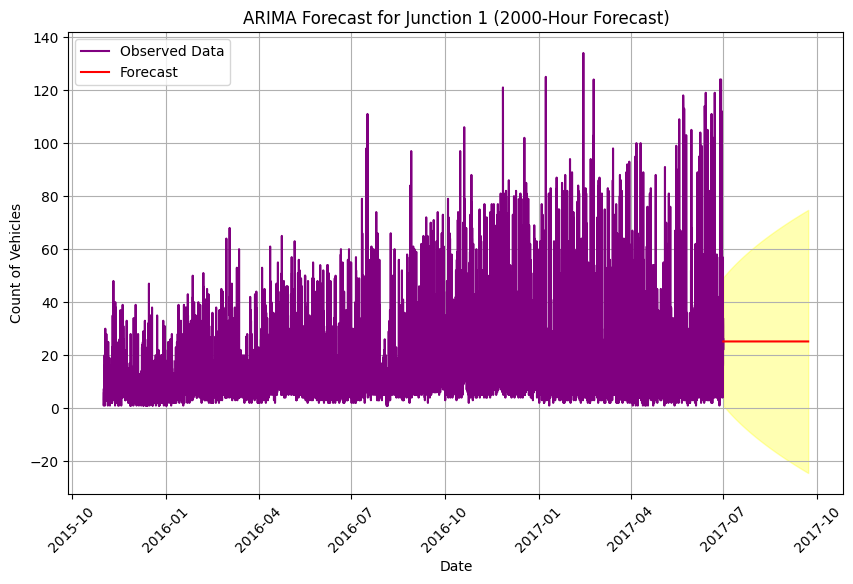

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)


ARIMA Summary for Junction 2:
                                SARIMAX Results                                
Dep. Variable:               Vehicles   No. Observations:                14591
Model:                 ARIMA(0, 1, 1)   Log Likelihood              -65157.079
Date:                Sat, 16 Nov 2024   AIC                         130318.158
Time:                        12:07:23   BIC                         130333.334
Sample:                             0   HQIC                        130323.200
                              - 14591                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.9579      0.002   -470.038      0.000      -0.962      -0.954
sigma2       443.0585      3.884    114.079      0.000     435.446     450.671
Ljung-Box (L1) (Q):  

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
<ipython-input-17-b7ce9adb066a>:22: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  forecast_index = pd.date_range(start=last_date + pd.Timedelta(hours=1), periods=forecast_steps, freq='H')


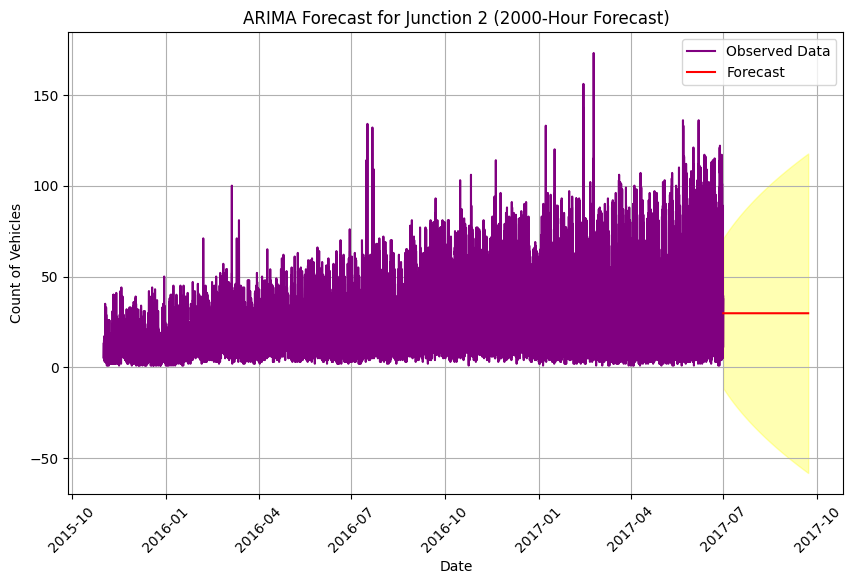

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)


ARIMA Summary for Junction 4:
                                SARIMAX Results                                
Dep. Variable:               Vehicles   No. Observations:                 4344
Model:                 ARIMA(0, 1, 1)   Log Likelihood              -20325.242
Date:                Sat, 16 Nov 2024   AIC                          40654.483
Time:                        12:07:23   BIC                          40667.236
Sample:                             0   HQIC                         40658.985
                               - 4344                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.9480      0.005   -199.251      0.000      -0.957      -0.939
sigma2       679.5793     12.566     54.080      0.000     654.950     704.208
Ljung-Box (L1) (Q):  

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
<ipython-input-17-b7ce9adb066a>:22: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  forecast_index = pd.date_range(start=last_date + pd.Timedelta(hours=1), periods=forecast_steps, freq='H')


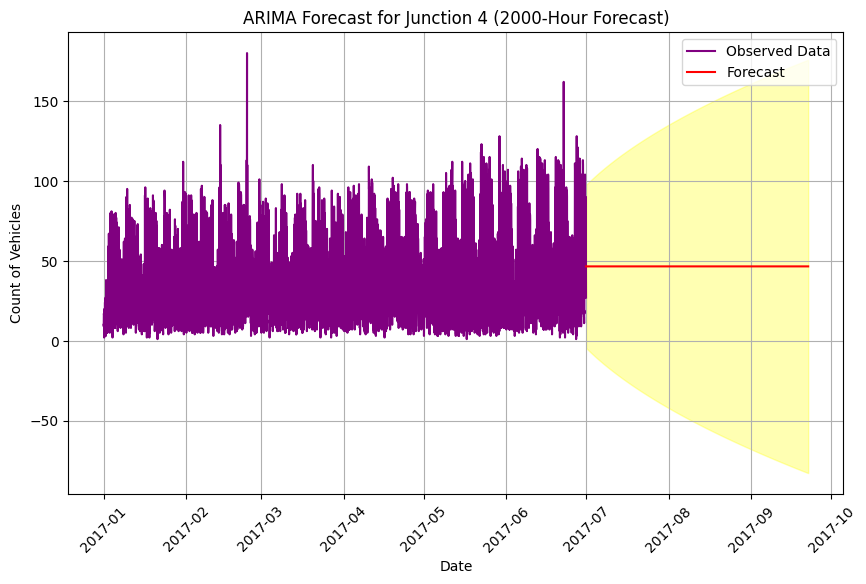

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
import pandas as pd

junctions = data['Junction'].unique()

forecast_steps = 2000
for junction in junctions:
    junction_data = data[data['Junction'] == junction]

    # ARIMA model
    arima_model = ARIMA(junction_data['Vehicles'].dropna(), order=(0, 1, 1))
    arima_fit = arima_model.fit()

    print(f'ARIMA Summary for Junction {junction}:\n', arima_fit.summary())

    forecast = arima_fit.get_forecast(steps=forecast_steps)

    forecast_ci = forecast.conf_int()

    last_date = junction_data['DateTime'].iloc[-1]
    forecast_index = pd.date_range(start=last_date + pd.Timedelta(hours=1), periods=forecast_steps, freq='H')
    plt.figure(figsize=(10, 6))
    plt.plot(junction_data['DateTime'], junction_data['Vehicles'], label='Observed Data', color='purple')
    plt.plot(forecast_index, forecast.predicted_mean, label='Forecast', color='red')
    plt.fill_between(forecast_index,
                     forecast_ci.iloc[:, 0],
                     forecast_ci.iloc[:, 1], color='yellow', alpha=0.3)
    plt.title(f'ARIMA Forecast for Junction {junction} ({forecast_steps}-Hour Forecast)')
    plt.xlabel('Date')
    plt.ylabel('Count of Vehicles')
    plt.legend()
    plt.grid()
    plt.xticks(rotation=45)
    plt.show()


* The high AIC and BIC values suggest the model has some level of complexity, but it may not fit the data well.
* Lower AIC and BIC values are typically preferred as they suggest better model fit with less complexity.
* The coefficient of the MA(1) term is -0.9599, with a very low p-value (less than 0.05), indicating that this term is statistically significant in explaining the data.
* Heteroskedasticity value of 4.34 and the high Jarque-Bera statistic (142561.21) suggest that the model may have issues with residual normality and constant variance, which could indicate a poor fit or that the model is missing important dynamics.

Model Fit: The ARIMA(0, 1, 1) model has moderate success in fitting the data, with Junction 4 appearing to benefit from the model's specifications, as indicated by the lowest AIC and BIC values.

Residual Issues: Across all junctions, there are significant residual problems. The Jarque-Bera statistics indicate non-normality, and the Ljung-Box Q-test reveals autocorrelation. The presence of heteroskedasticity in all junctions further suggests that the model may not fully capture all the data patterns, and more advanced models like GARCH or ARCH could be considered to address these issues.

MA(1) Significance: The MA(1) term is significant across all junctions, indicating that the immediate past error term plays a substantial role in predicting future traffic volumes.

## **SARIMAX**

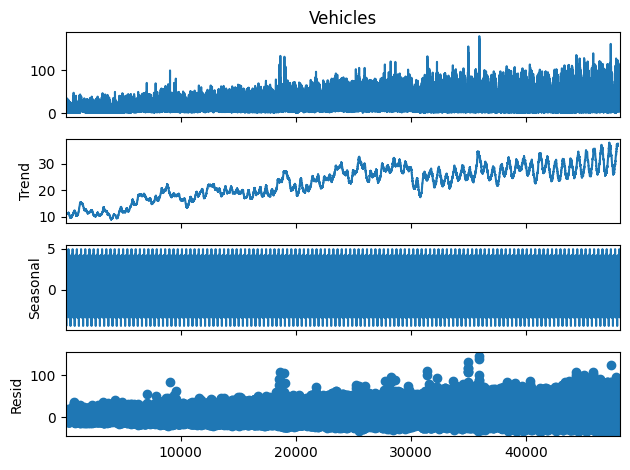

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(data['Vehicles'], model='additive', period=365)

decomposition.plot()
plt.show()

from statsmodels.tsa.statespace.sarimax import SARIMAX

### Fit the SARIMAX model for each junction
     for junction in junctions:
      junction_data = data[data['Junction'] == junction].set_index('DateTime')

      # Fit the SARIMAX model (you can change the order as needed)
      sarimax_model = SARIMAX(junction_data['Vehicles'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 24))  # Seasonal order may need adjustment
      sarimax_fit = sarimax_model.fit()

      print(f'SARIMAX Summary for Junction {junction}:\n', sarimax_fit.summary())

      # Forecasting
      forecast = sarimax_fit.get_forecast(steps=forecast_steps)
      forecast_ci = forecast.conf_int()

      # Plotting forecast
      plt.figure(figsize=(10, 6))
      plt.plot(junction_data.index, junction_data['Vehicles'], label='Observed Data', color='purple')
      plt.plot(forecast.index, forecast.predicted_mean, label='Forecast', color='red')
      plt.fill_between(forecast.index, forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1], color='yellow', alpha=0.3)
      plt.title(f'SARIMAX Forecast for Junction {junction}')
      plt.xlabel('Date')
      plt.ylabel('Count of Vehicles')
      plt.legend()
      plt.grid()
      plt.show()

## **Simple Exponential Smoothing**

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)


SES Summary for Junction 3:
                        SimpleExpSmoothing Model Results                       
Dep. Variable:               Vehicles   No. Observations:                14592
Model:             SimpleExpSmoothing   SSE                        6005971.197
Optimized:                       True   AIC                          87848.366
Trend:                           None   BIC                          87863.542
Seasonal:                        None   AICC                         87848.368
Seasonal Periods:                None   Date:                 Sat, 16 Nov 2024
Box-Cox:                        False   Time:                         12:07:25
Box-Cox Coeff.:                  None                                         
                       coeff                 code              optimized      
------------------------------------------------------------------------------
smoothing_level            0.0625581                alpha                 True
initial_level          

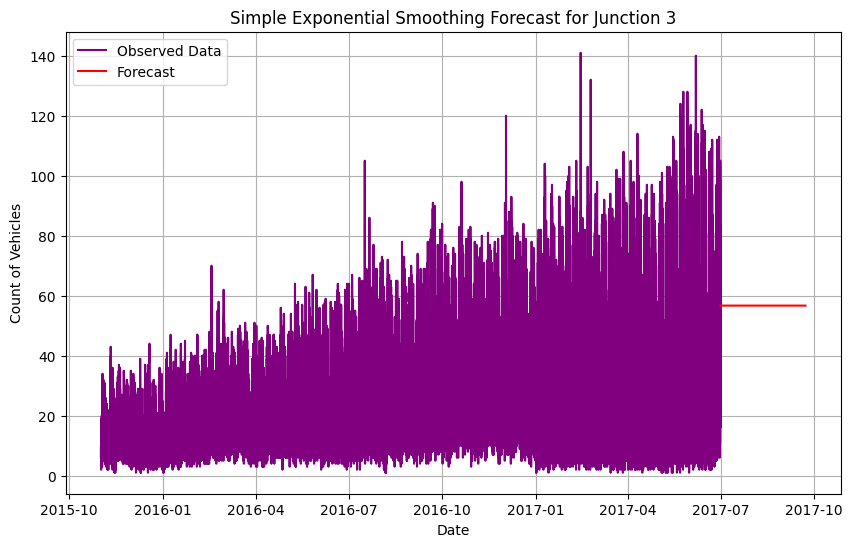

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)


SES Summary for Junction 1:
                        SimpleExpSmoothing Model Results                       
Dep. Variable:               Vehicles   No. Observations:                14591
Model:             SimpleExpSmoothing   SSE                        2216695.589
Optimized:                       True   AIC                          73299.962
Trend:                           None   BIC                          73315.139
Seasonal:                        None   AICC                         73299.965
Seasonal Periods:                None   Date:                 Sat, 16 Nov 2024
Box-Cox:                        False   Time:                         12:07:25
Box-Cox Coeff.:                  None                                         
                       coeff                 code              optimized      
------------------------------------------------------------------------------
smoothing_level            0.0399037                alpha                 True
initial_level          

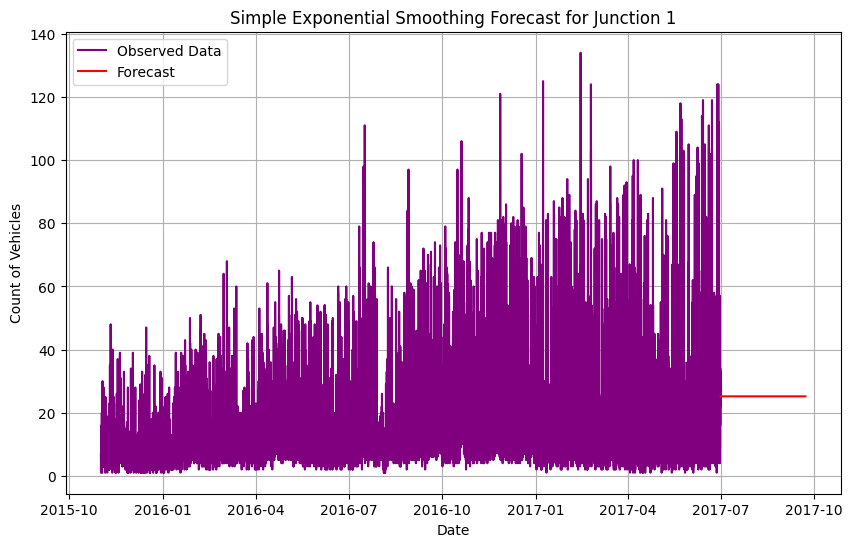

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)


SES Summary for Junction 2:
                        SimpleExpSmoothing Model Results                       
Dep. Variable:               Vehicles   No. Observations:                14591
Model:             SimpleExpSmoothing   SSE                        6464233.259
Optimized:                       True   AIC                          88916.225
Trend:                           None   BIC                          88931.401
Seasonal:                        None   AICC                         88916.228
Seasonal Periods:                None   Date:                 Sat, 16 Nov 2024
Box-Cox:                        False   Time:                         12:07:26
Box-Cox Coeff.:                  None                                         
                       coeff                 code              optimized      
------------------------------------------------------------------------------
smoothing_level            0.0417939                alpha                 True
initial_level          

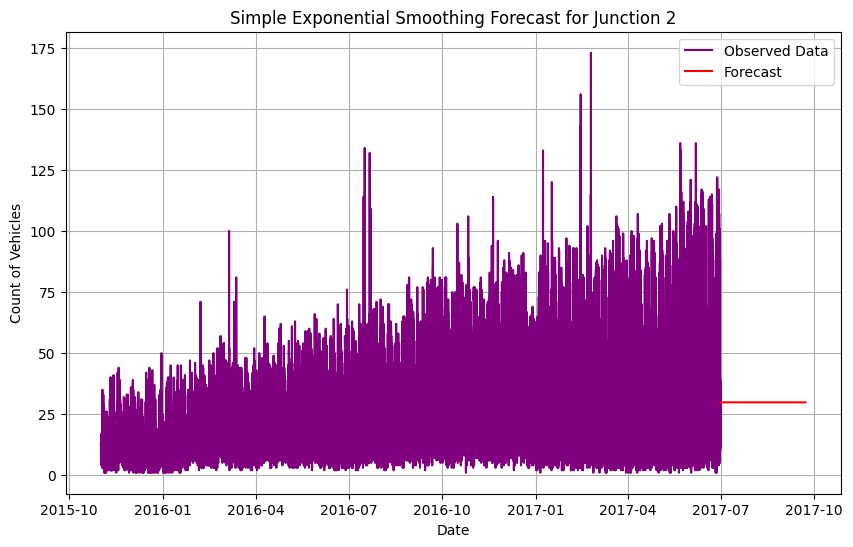

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)


SES Summary for Junction 4:
                        SimpleExpSmoothing Model Results                       
Dep. Variable:               Vehicles   No. Observations:                 4344
Model:             SimpleExpSmoothing   SSE                        2952055.742
Optimized:                       True   AIC                          28333.229
Trend:                           None   BIC                          28345.982
Seasonal:                        None   AICC                         28333.238
Seasonal Periods:                None   Date:                 Sat, 16 Nov 2024
Box-Cox:                        False   Time:                         12:07:26
Box-Cox Coeff.:                  None                                         
                       coeff                 code              optimized      
------------------------------------------------------------------------------
smoothing_level            0.0521153                alpha                 True
initial_level          

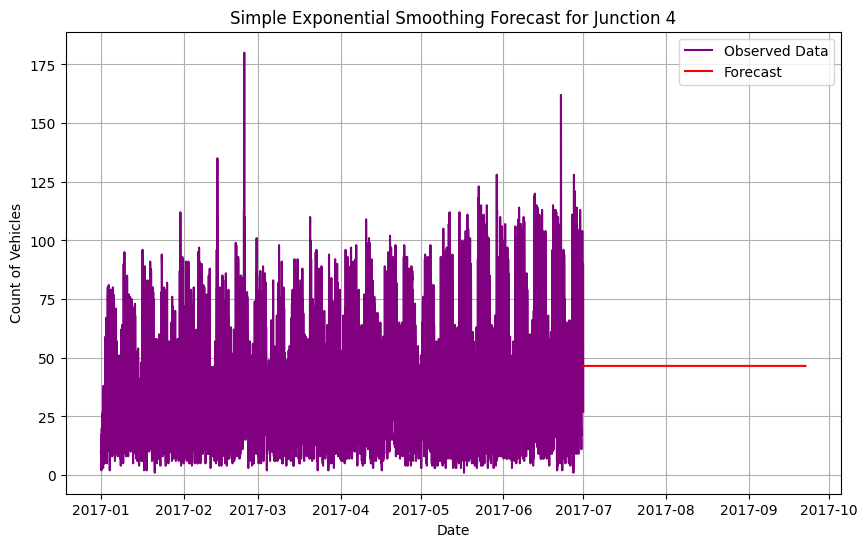

In [ ]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

for junction in junctions:
    junction_data = data[data['Junction'] == junction].set_index('DateTime')

    ses_model = SimpleExpSmoothing(junction_data['Vehicles'])
    ses_fit = ses_model.fit()

    print(f'SES Summary for Junction {junction}:\n', ses_fit.summary())

    # Forecasting
    forecast = ses_fit.forecast(steps=forecast_steps)

    plt.figure(figsize=(10, 6))
    plt.plot(junction_data.index, junction_data['Vehicles'], label='Observed Data', color='purple')
    plt.plot(forecast.index, forecast, label='Forecast', color='red')
    plt.title(f'Simple Exponential Smoothing Forecast for Junction {junction}')
    plt.xlabel('Date')
    plt.ylabel('Count of Vehicles')
    plt.legend()
    plt.grid()
    plt.show()


## **Prophet Model**

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7vs5_l7f/q0xrkoh0.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7vs5_l7f/snymbrt9.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=91900', 'data', 'file=/tmp/tmp7vs5_l7f/q0xrkoh0.json', 'init=/tmp/tmp7vs5_l7f/snymbrt9.json', 'output', 'file=/tmp/tmp7vs5_l7f/prophet_modelviq_c4k9/prophet_model-20241116120730.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:07:30 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:07:39 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.10/dist-packages/prophet/forecaster.py:1854: FutureWarning: 'H' is deprecated and will be removed in a future version

RMSE: 33.60551435218758


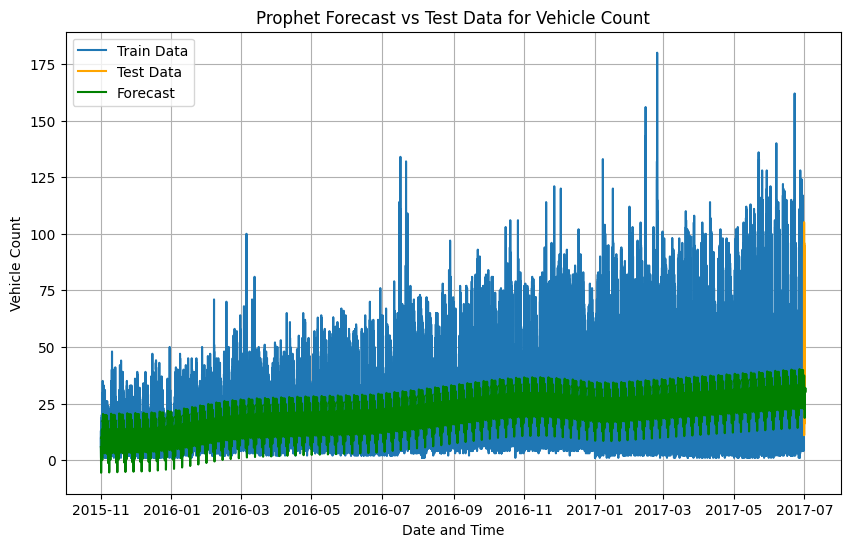

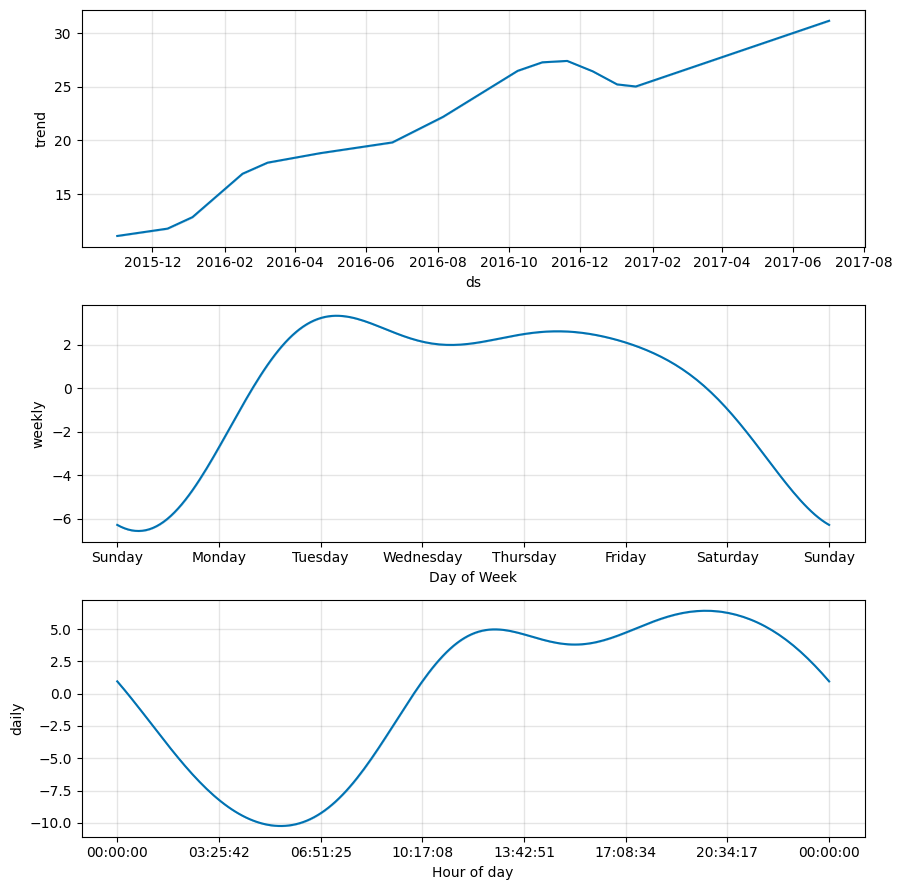

In [ ]:
from prophet import Prophet
from sklearn.metrics import mean_squared_error

data['DateTime'] = pd.to_datetime(data['DateTime'], format='%Y-%m-%d %H:%M:%S')

data = data[['DateTime', 'Vehicles']].rename(columns={'DateTime': 'ds', 'Vehicles': 'y'})

train = data[:-30]
test = data[-30:]

model = Prophet()
model.fit(train)

future = model.make_future_dataframe(periods=30, freq='H')  # Forecasting for the next 30 hours
forecast = model.predict(future)

rmse = np.sqrt(mean_squared_error(test['y'], forecast['yhat'][-30:]))
print(f'RMSE: {rmse}')

plt.figure(figsize=(10, 6))
plt.plot(train['ds'], train['y'], label='Train Data')
plt.plot(test['ds'], test['y'], label='Test Data', color='orange')
plt.plot(forecast['ds'], forecast['yhat'], label='Forecast', color='green')
plt.title('Prophet Forecast vs Test Data for Vehicle Count')
plt.xlabel('Date and Time')
plt.ylabel('Vehicle Count')
plt.legend()
plt.grid()
plt.show()

model.plot_components(forecast)
plt.show()



INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7vs5_l7f/2kh0uogf.json


Columns in the DataFrame: Index(['DateTime', 'Junction', 'Vehicles', 'ID'], dtype='object')


DEBUG:cmdstanpy:input tempfile: /tmp/tmp7vs5_l7f/89898_j1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=26362', 'data', 'file=/tmp/tmp7vs5_l7f/2kh0uogf.json', 'init=/tmp/tmp7vs5_l7f/89898_j1.json', 'output', 'file=/tmp/tmp7vs5_l7f/prophet_modelaulc7eet/prophet_model-20241116120743.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:07:43 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:07:48 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.10/dist-packages/prophet/forecaster.py:1854: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  dates = pd.date_range(


Junction 1 - RMSE: 13.197305461724916


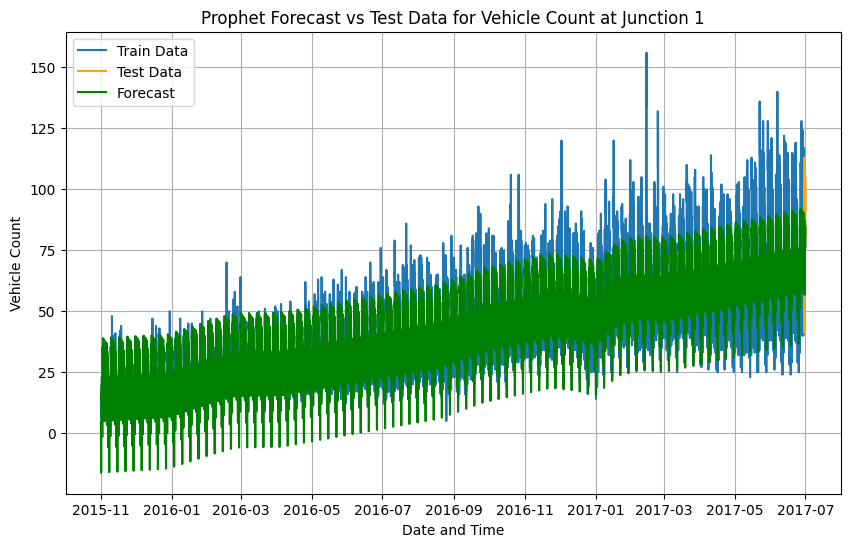

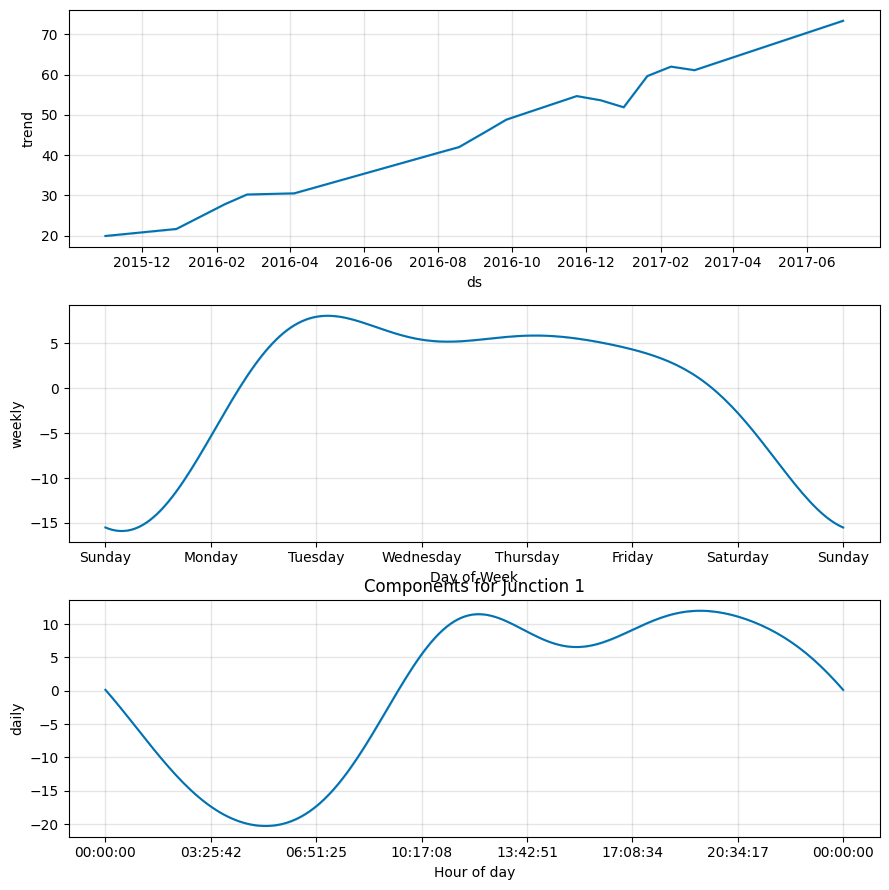

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7vs5_l7f/0znpt3j5.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7vs5_l7f/kjlpo2en.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=29069', 'data', 'file=/tmp/tmp7vs5_l7f/0znpt3j5.json', 'init=/tmp/tmp7vs5_l7f/kjlpo2en.json', 'output', 'file=/tmp/tmp7vs5_l7f/prophet_modelbix2045b/prophet_model-20241116120752.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:07:52 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:07:56 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.10/dist-packages/prophet/forecaster.py:1854: FutureWarning: 'H' is deprecated and will be removed in a future version

Junction 2 - RMSE: 5.028972032739123


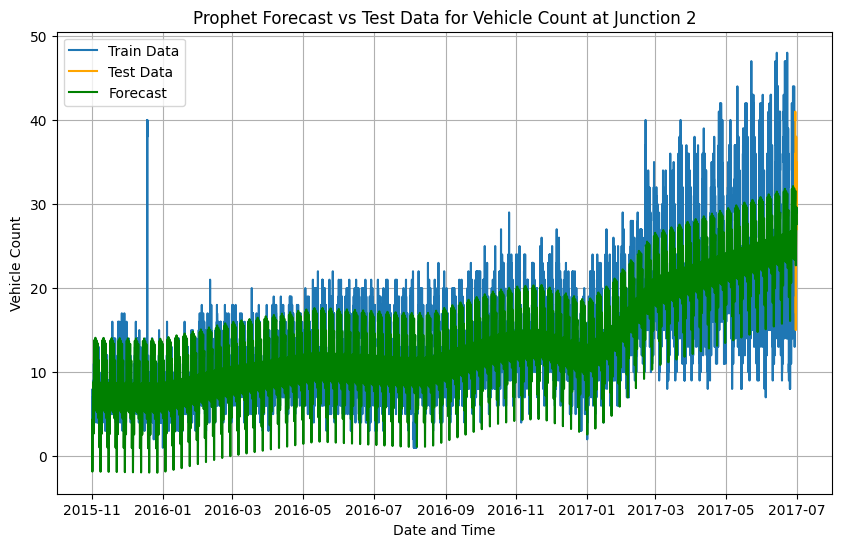

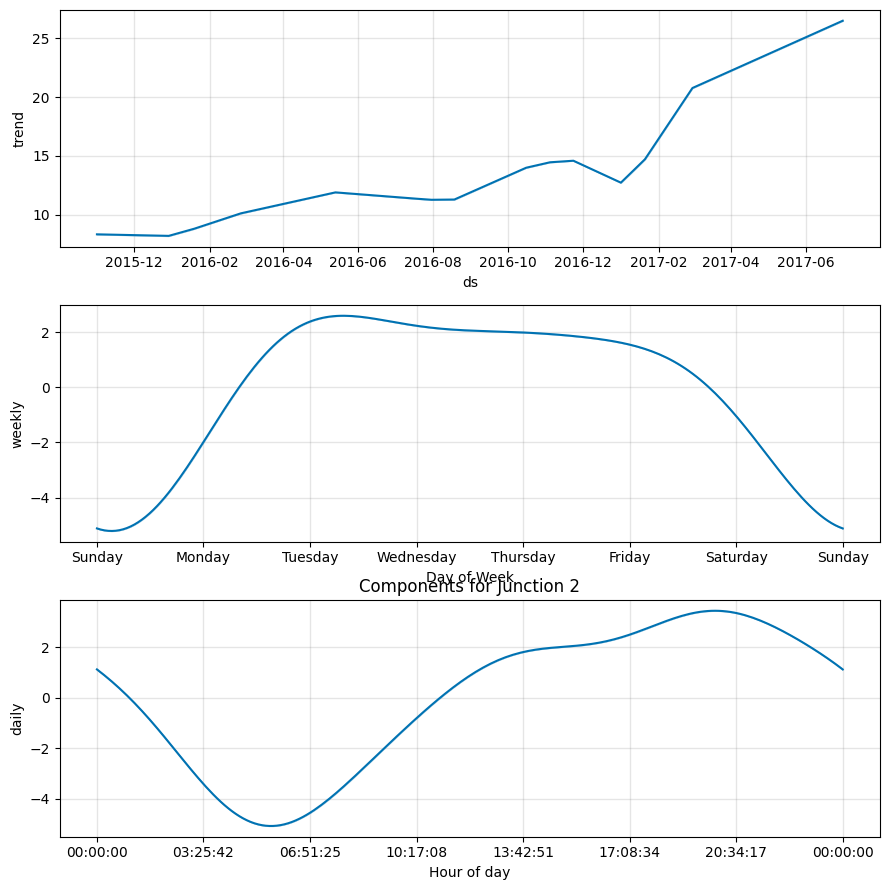

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7vs5_l7f/8j_wt38h.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7vs5_l7f/qtyz4v2y.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=71701', 'data', 'file=/tmp/tmp7vs5_l7f/8j_wt38h.json', 'init=/tmp/tmp7vs5_l7f/qtyz4v2y.json', 'output', 'file=/tmp/tmp7vs5_l7f/prophet_model_gdl82c3/prophet_model-20241116120800.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:08:00 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:08:04 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.10/dist-packages/prophet/forecaster.py:1854: FutureWarning: 'H' is deprecated and will be removed in a future version

Junction 3 - RMSE: 8.835089874662268


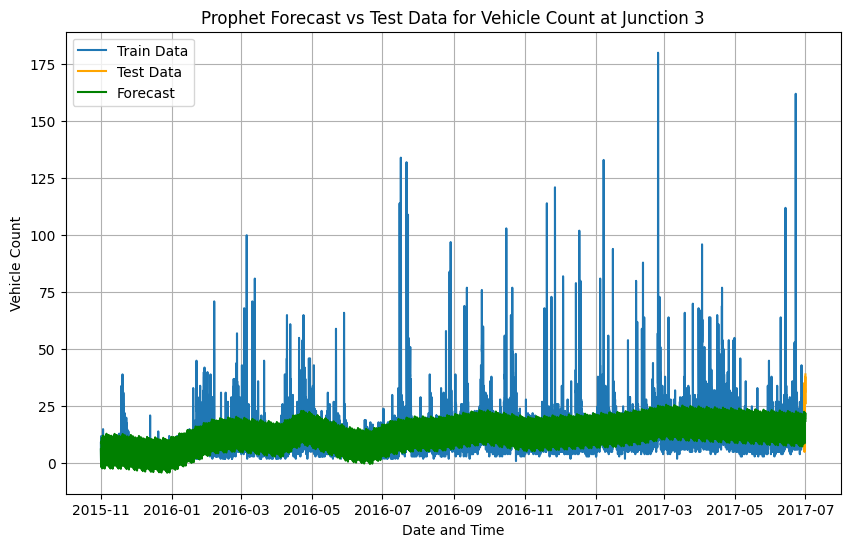

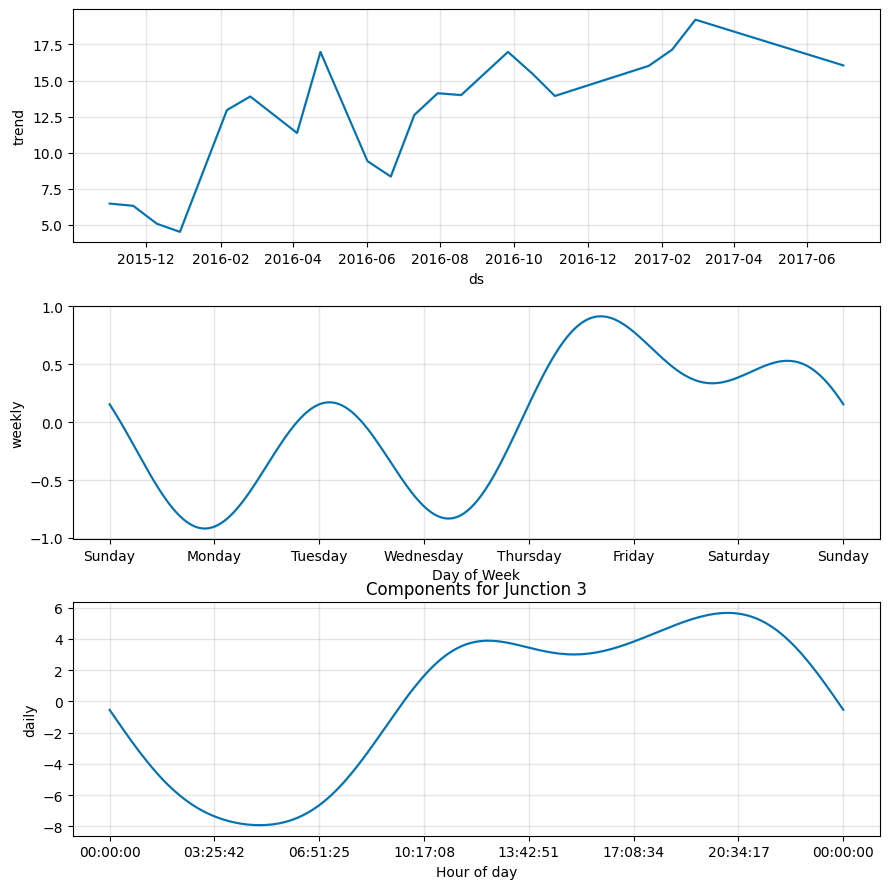

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7vs5_l7f/37tx92cp.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7vs5_l7f/yd9uv7ea.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=47618', 'data', 'file=/tmp/tmp7vs5_l7f/37tx92cp.json', 'init=/tmp/tmp7vs5_l7f/yd9uv7ea.json', 'output', 'file=/tmp/tmp7vs5_l7f/prophet_model7bvgy135/prophet_model-20241116120807.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:08:07 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:08:08 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.10/dist-packages/prophet/forecaster.py:1854: FutureWarning: 'H' is deprecated and will be removed in a future version

Junction 4 - RMSE: 5.210343478342132


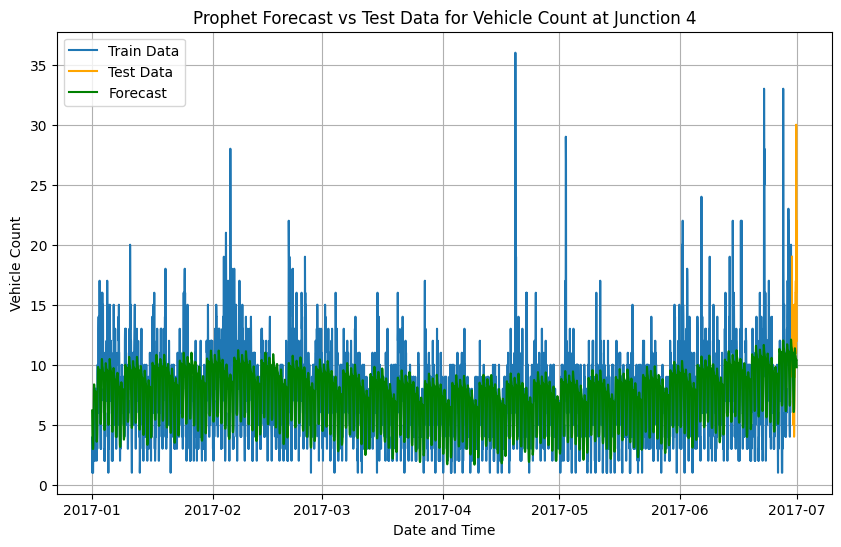

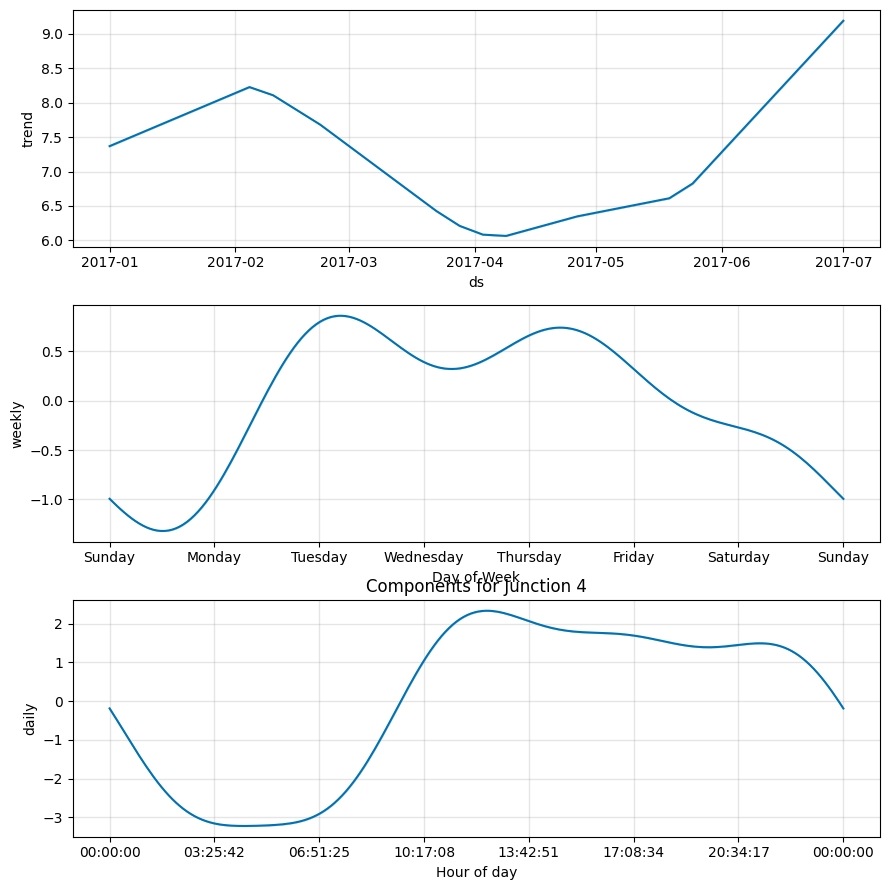

In [ ]:
import pandas as pd
from prophet import Prophet
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np

data = pd.read_csv('/content/traffic.csv')

data['DateTime'] = pd.to_datetime(data['DateTime'], format='%Y-%m-%d %H:%M:%S')

print("Columns in the DataFrame:", data.columns)

if 'DateTime' in data.columns and 'Vehicles' in data.columns and 'Junction' in data.columns:
    data = data[['DateTime', 'Vehicles', 'Junction']].rename(columns={'DateTime': 'ds', 'Vehicles': 'y'})

    junctions = data['Junction'].unique()

    for junction in junctions:
        junction_data = data[data['Junction'] == junction]

        train = junction_data[:-30]
        test = junction_data[-30:]

        model = Prophet()
        model.fit(train)

        future = model.make_future_dataframe(periods=30, freq='H')
        forecast = model.predict(future)

        rmse = np.sqrt(mean_squared_error(test['y'], forecast['yhat'][-30:]))
        print(f'Junction {junction} - RMSE: {rmse}')

        plt.figure(figsize=(10, 6))
        plt.plot(train['ds'], train['y'], label='Train Data')
        plt.plot(test['ds'], test['y'], label='Test Data', color='orange')
        plt.plot(forecast['ds'], forecast['yhat'], label='Forecast', color='green')
        plt.title(f'Prophet Forecast vs Test Data for Vehicle Count at Junction {junction}')
        plt.xlabel('Date and Time')
        plt.ylabel('Vehicle Count')
        plt.legend()
        plt.grid()
        plt.show()

        model.plot_components(forecast)
        plt.title(f'Components for Junction {junction}')
        plt.show()
else:
    print("Required columns are missing in the DataFrame.")



###Junction 1 - RMSE: 13.197305461724916
###Junction 2 - RMSE: 5.028972032739123
###Junction 3 - RMSE: 8.835089874662268
###Junction 4 - RMSE: 5.210343478342132

##**We can say that Junction 2 has the best accuracy after using prophet model**

## **ARCH model**

In [ ]:
!pip install arch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 985.1/985.1 kB 32.7 MB/s eta 0:00:00


In [ ]:
print(data.columns)


Index(['ds', 'y', 'Junction'], dtype='object')


Iteration:      1,   Func. Count:      6,   Neg. LLF: 29879720.33241021
Iteration:      2,   Func. Count:     12,   Neg. LLF: 62888.46792973764
Iteration:      3,   Func. Count:     18,   Neg. LLF: 108388.25697558519
Iteration:      4,   Func. Count:     26,   Neg. LLF: 61613.047304008855
Iteration:      5,   Func. Count:     32,   Neg. LLF: 105158.87859786098
Iteration:      6,   Func. Count:     38,   Neg. LLF: 60505.84340787116
Iteration:      7,   Func. Count:     43,   Neg. LLF: 60812.10439789811
Iteration:      8,   Func. Count:     49,   Neg. LLF: 60536.275905680115
Iteration:      9,   Func. Count:     55,   Neg. LLF: 60477.13864130132
Iteration:     10,   Func. Count:     60,   Neg. LLF: 60469.639347263066
Iteration:     11,   Func. Count:     65,   Neg. LLF: 60469.614919136206
Iteration:     12,   Func. Count:     70,   Neg. LLF: 60469.61423364593
Iteration:     13,   Func. Count:     75,   Neg. LLF: 60469.61422881629
Iteration:     14,   Func. Count:     79,   Neg. LLF: 6046

<ipython-input-24-03ef6b7869b4>:23: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  plt.plot(pd.date_range(start=junction_data.index[-1] + pd.Timedelta(hours=1), periods=forecast_steps, freq='H'), predicted_mean, label='Forecast', color='red')


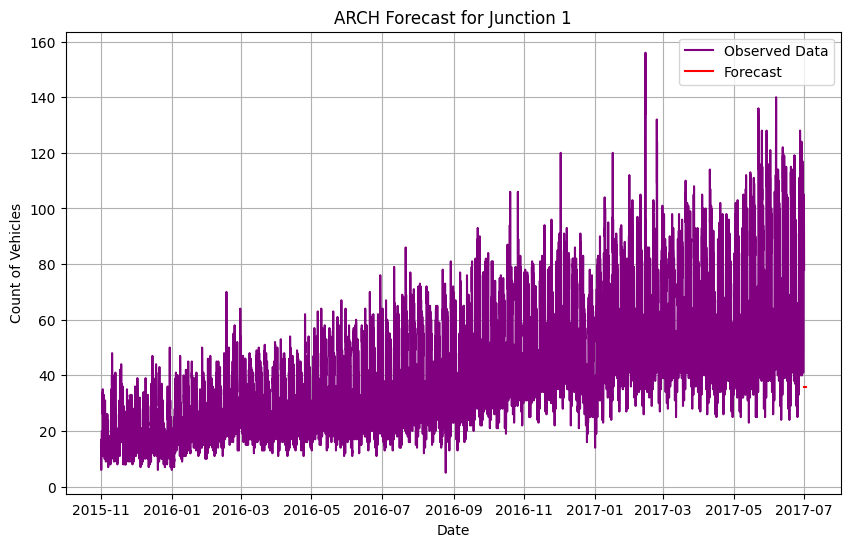

Iteration:      1,   Func. Count:      6,   Neg. LLF: 129495121687350.69
Iteration:      2,   Func. Count:     14,   Neg. LLF: 700331112.8367574
Iteration:      3,   Func. Count:     21,   Neg. LLF: 98190.44983451221
Iteration:      4,   Func. Count:     29,   Neg. LLF: 45661.00125329031
Iteration:      5,   Func. Count:     35,   Neg. LLF: 61053.48878058899
Iteration:      6,   Func. Count:     42,   Neg. LLF: 45182.78972188331
Iteration:      7,   Func. Count:     48,   Neg. LLF: 44577.52477672873
Iteration:      8,   Func. Count:     54,   Neg. LLF: 44124.802828573425
Iteration:      9,   Func. Count:     59,   Neg. LLF: 44122.87446904142
Iteration:     10,   Func. Count:     64,   Neg. LLF: 44120.68254027759
Iteration:     11,   Func. Count:     69,   Neg. LLF: 44120.06091569136
Iteration:     12,   Func. Count:     74,   Neg. LLF: 44119.44321958092
Iteration:     13,   Func. Count:     79,   Neg. LLF: 44119.19777018897
Iteration:     14,   Func. Count:     84,   Neg. LLF: 44119.14

<ipython-input-24-03ef6b7869b4>:23: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  plt.plot(pd.date_range(start=junction_data.index[-1] + pd.Timedelta(hours=1), periods=forecast_steps, freq='H'), predicted_mean, label='Forecast', color='red')


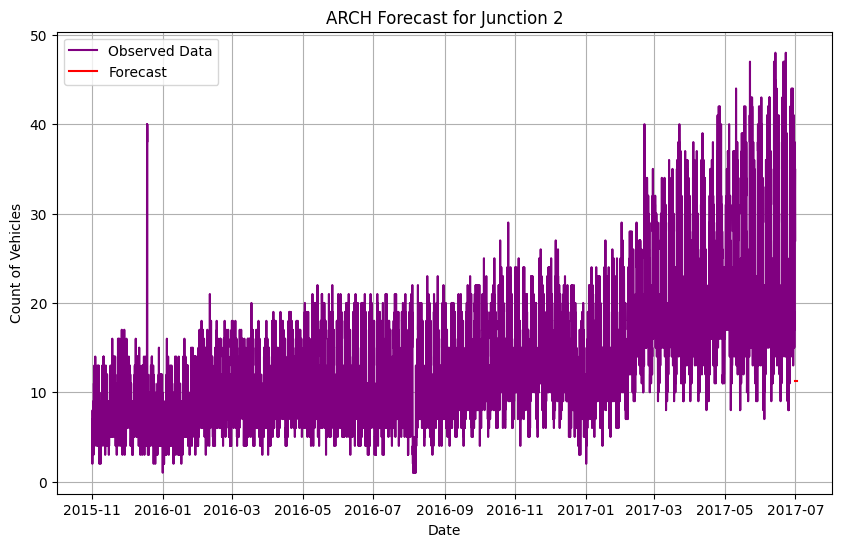

Iteration:      1,   Func. Count:      6,   Neg. LLF: 115073.22389970167
Iteration:      2,   Func. Count:     16,   Neg. LLF: 78737.3891117076
Iteration:      3,   Func. Count:     22,   Neg. LLF: 49006.25701938687
Iteration:      4,   Func. Count:     27,   Neg. LLF: 48382.4705619326
Iteration:      5,   Func. Count:     32,   Neg. LLF: 48337.33255726154
Iteration:      6,   Func. Count:     37,   Neg. LLF: 48247.39975064568
Iteration:      7,   Func. Count:     42,   Neg. LLF: 48221.86864799852
Iteration:      8,   Func. Count:     48,   Neg. LLF: 48181.93695611312
Iteration:      9,   Func. Count:     53,   Neg. LLF: 48181.49254388682
Iteration:     10,   Func. Count:     58,   Neg. LLF: 48181.48277154802
Iteration:     11,   Func. Count:     63,   Neg. LLF: 48181.482136513034
Iteration:     12,   Func. Count:     67,   Neg. LLF: 48181.48213456241
Optimization terminated successfully    (Exit mode 0)
            Current function value: 48181.482136513034
            Iterations: 12


<ipython-input-24-03ef6b7869b4>:23: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  plt.plot(pd.date_range(start=junction_data.index[-1] + pd.Timedelta(hours=1), periods=forecast_steps, freq='H'), predicted_mean, label='Forecast', color='red')


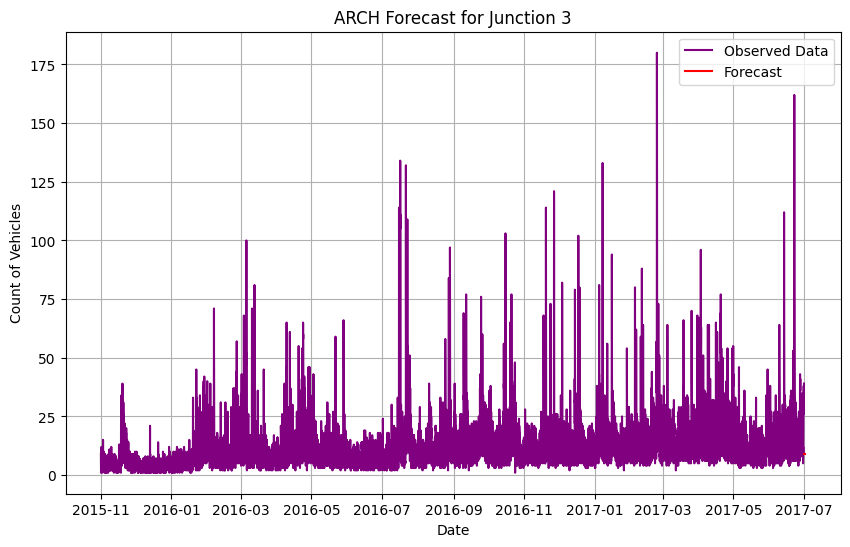

Iteration:      1,   Func. Count:      6,   Neg. LLF: 29570.46815459175
Iteration:      2,   Func. Count:     15,   Neg. LLF: 3193750901.294353
Iteration:      3,   Func. Count:     22,   Neg. LLF: 11751.106736344786
Iteration:      4,   Func. Count:     28,   Neg. LLF: 11245.953058857867
Iteration:      5,   Func. Count:     34,   Neg. LLF: 11175.355332657688
Iteration:      6,   Func. Count:     39,   Neg. LLF: 11176.470366681759
Iteration:      7,   Func. Count:     45,   Neg. LLF: 11174.999197586574
Iteration:      8,   Func. Count:     51,   Neg. LLF: 11174.862052573772
Iteration:      9,   Func. Count:     56,   Neg. LLF: 11174.861510422492
Iteration:     10,   Func. Count:     61,   Neg. LLF: 11174.861464111005
Iteration:     11,   Func. Count:     66,   Neg. LLF: 11174.861462642077
Iteration:     12,   Func. Count:     70,   Neg. LLF: 11174.861462642059
Optimization terminated successfully    (Exit mode 0)
            Current function value: 11174.861462642077
            Itera

<ipython-input-24-03ef6b7869b4>:23: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  plt.plot(pd.date_range(start=junction_data.index[-1] + pd.Timedelta(hours=1), periods=forecast_steps, freq='H'), predicted_mean, label='Forecast', color='red')


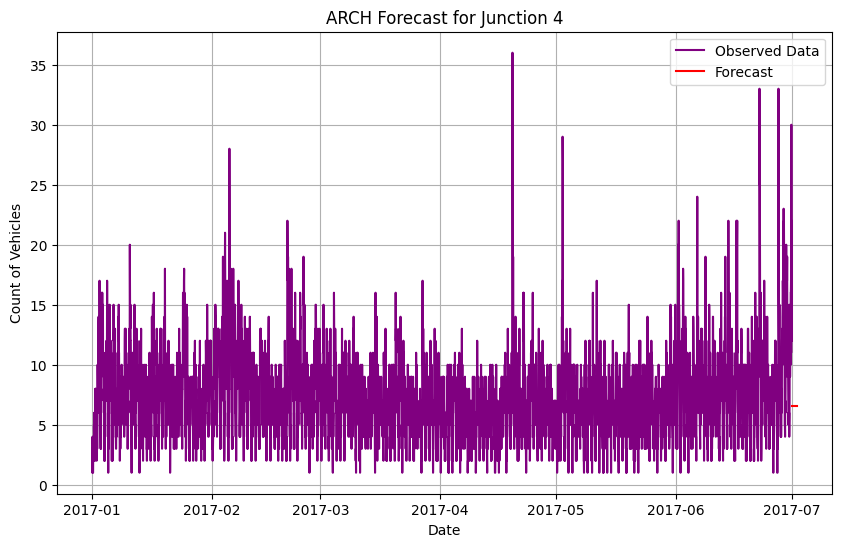

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from arch import arch_model

# Load and preprocess data
data['ds'] = pd.to_datetime(data['ds'], format='%Y-%m-%d %H:%M:%S')
junctions = data['Junction'].unique()
forecast_steps = 30  # Adjust the forecast horizon as needed

for junction in junctions:
    junction_data = data[data['Junction'] == junction].set_index('ds')

    model = arch_model(junction_data['y'], vol='Garch', p=1, q=1)
    model_fit = model.fit()

    print(f'ARCH Model Summary for Junction {junction}:\n', model_fit.summary())

    forecast = model_fit.forecast(horizon=forecast_steps)
    predicted_mean = forecast.mean.iloc[-1].values

    plt.figure(figsize=(10, 6))
    plt.plot(junction_data.index, junction_data['y'], label='Observed Data', color='purple')
    plt.plot(pd.date_range(start=junction_data.index[-1] + pd.Timedelta(hours=1), periods=forecast_steps, freq='H'), predicted_mean, label='Forecast', color='red')
    plt.title(f'ARCH Forecast for Junction {junction}')
    plt.xlabel('Date')
    plt.ylabel('Count of Vehicles')
    plt.legend()
    plt.grid()
    plt.show()


## The below code does the following:

This code forecasts traffic for multiple junctions using **ARIMA**, **SARIMAX**, **Prophet**, and **ARCH** models. It trains each model on historical data, generates predictions, and evaluates their performance by calculating **Mean Squared Error (MSE)**. The results are compiled into a comparison table, helping identify the best-performing model for accurate traffic forecasting.

In [ ]:
import pandas as pd
from sklearn.metrics import mean_squared_error, accuracy_score, precision_score
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from prophet import Prophet
from arch import arch_model
import numpy as np

# Initialize prediction dictionaries
arima_predicted = {}
sarimax_predicted = {}
prophet_predicted = {}
arch_predicted = {}

# Generate predictions for each junction and store them
junctions = data['Junction'].unique()

for junction in junctions:
    junction_data = data[data['Junction'] == junction].set_index('ds')
    actual_values = junction_data['y'].values

    # 1. ARIMA Model
    arima_model = ARIMA(junction_data['y'], order=(1, 1, 1)).fit()
    arima_forecast = arima_model.forecast(steps=len(actual_values))
    arima_predicted[junction] = arima_forecast

    # 2. SARIMAX Model
    sarimax_model = SARIMAX(junction_data['y'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 24)).fit()
    sarimax_forecast = sarimax_model.forecast(steps=len(actual_values))
    sarimax_predicted[junction] = sarimax_forecast

    # 3. Prophet Model
    prophet_data = data[data['Junction'] == junction][['ds', 'y']]
    prophet_model = Prophet()
    prophet_model.fit(prophet_data)
    future = prophet_model.make_future_dataframe(periods=len(actual_values), freq='H')
    prophet_forecast = prophet_model.predict(future)
    prophet_predicted[junction] = prophet_forecast['yhat'].values[-len(actual_values):]

    # 4. ARCH Model
    arch_model_fitted = arch_model(junction_data['y'], vol='Garch', p=1, q=1).fit()
    arch_forecast = arch_model_fitted.forecast(horizon=len(actual_values))
    arch_predicted[junction] = arch_forecast.mean.iloc[-1].values

# Comparison matrix
comparison_data = {}

for model_name in ['ARIMA', 'SARIMAX', 'Prophet', 'ARCH']:
    comparison_data[model_name] = {}
    for junction in junctions:
        actual_values = data[data['Junction'] == junction]['y'].values

        if model_name == 'ARIMA':
            predicted_values = arima_predicted[junction]
        elif model_name == 'SARIMAX':
            predicted_values = sarimax_predicted[junction]
        elif model_name == 'Prophet':
            predicted_values = prophet_predicted[junction]
        elif model_name == 'ARCH':
            predicted_values = arch_predicted[junction]

        # Store MSE (Mean Squared Error) for comparison
        mse = mean_squared_error(actual_values, predicted_values)
        comparison_data[model_name][junction] = mse

# Converting comparison_data to a DataFrame for easy visualization
comparison_df = pd.DataFrame(comparison_data)
print(comparison_df)


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dat

Iteration:      1,   Func. Count:      6,   Neg. LLF: 29879720.33241021
Iteration:      2,   Func. Count:     12,   Neg. LLF: 62888.46792973764
Iteration:      3,   Func. Count:     18,   Neg. LLF: 108388.25697558519
Iteration:      4,   Func. Count:     26,   Neg. LLF: 61613.047304008855
Iteration:      5,   Func. Count:     32,   Neg. LLF: 105158.87859786098
Iteration:      6,   Func. Count:     38,   Neg. LLF: 60505.84340787116
Iteration:      7,   Func. Count:     43,   Neg. LLF: 60812.10439789811
Iteration:      8,   Func. Count:     49,   Neg. LLF: 60536.275905680115
Iteration:      9,   Func. Count:     55,   Neg. LLF: 60477.13864130132
Iteration:     10,   Func. Count:     60,   Neg. LLF: 60469.639347263066
Iteration:     11,   Func. Count:     65,   Neg. LLF: 60469.614919136206
Iteration:     12,   Func. Count:     70,   Neg. LLF: 60469.61423364593
Iteration:     13,   Func. Count:     75,   Neg. LLF: 60469.61422881629
Iteration:     14,   Func. Count:     79,   Neg. LLF: 6046

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dat

Iteration:      1,   Func. Count:      6,   Neg. LLF: 129495121687350.69
Iteration:      2,   Func. Count:     14,   Neg. LLF: 700331112.8367574
Iteration:      3,   Func. Count:     21,   Neg. LLF: 98190.44983451221
Iteration:      4,   Func. Count:     29,   Neg. LLF: 45661.00125329031
Iteration:      5,   Func. Count:     35,   Neg. LLF: 61053.48878058899
Iteration:      6,   Func. Count:     42,   Neg. LLF: 45182.78972188331
Iteration:      7,   Func. Count:     48,   Neg. LLF: 44577.52477672873
Iteration:      8,   Func. Count:     54,   Neg. LLF: 44124.802828573425
Iteration:      9,   Func. Count:     59,   Neg. LLF: 44122.87446904142
Iteration:     10,   Func. Count:     64,   Neg. LLF: 44120.68254027759
Iteration:     11,   Func. Count:     69,   Neg. LLF: 44120.06091569136
Iteration:     12,   Func. Count:     74,   Neg. LLF: 44119.44321958092
Iteration:     13,   Func. Count:     79,   Neg. LLF: 44119.19777018897
Iteration:     14,   Func. Count:     84,   Neg. LLF: 44119.14

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dat

Iteration:      1,   Func. Count:      6,   Neg. LLF: 115073.22389970167
Iteration:      2,   Func. Count:     16,   Neg. LLF: 78737.3891117076
Iteration:      3,   Func. Count:     22,   Neg. LLF: 49006.25701938687
Iteration:      4,   Func. Count:     27,   Neg. LLF: 48382.4705619326
Iteration:      5,   Func. Count:     32,   Neg. LLF: 48337.33255726154
Iteration:      6,   Func. Count:     37,   Neg. LLF: 48247.39975064568
Iteration:      7,   Func. Count:     42,   Neg. LLF: 48221.86864799852
Iteration:      8,   Func. Count:     48,   Neg. LLF: 48181.93695611312
Iteration:      9,   Func. Count:     53,   Neg. LLF: 48181.49254388682
Iteration:     10,   Func. Count:     58,   Neg. LLF: 48181.48277154802
Iteration:     11,   Func. Count:     63,   Neg. LLF: 48181.482136513034
Iteration:     12,   Func. Count:     67,   Neg. LLF: 48181.48213456241
Optimization terminated successfully    (Exit mode 0)
            Current function value: 48181.482136513034
            Iterations: 12


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dat

Iteration:      1,   Func. Count:      6,   Neg. LLF: 29570.46815459175
Iteration:      2,   Func. Count:     15,   Neg. LLF: 3193750901.294353
Iteration:      3,   Func. Count:     22,   Neg. LLF: 11751.106736344786
Iteration:      4,   Func. Count:     28,   Neg. LLF: 11245.953058857867
Iteration:      5,   Func. Count:     34,   Neg. LLF: 11175.355332657688
Iteration:      6,   Func. Count:     39,   Neg. LLF: 11176.470366681759
Iteration:      7,   Func. Count:     45,   Neg. LLF: 11174.999197586574
Iteration:      8,   Func. Count:     51,   Neg. LLF: 11174.862052573772
Iteration:      9,   Func. Count:     56,   Neg. LLF: 11174.861510422492
Iteration:     10,   Func. Count:     61,   Neg. LLF: 11174.861464111005
Iteration:     11,   Func. Count:     66,   Neg. LLF: 11174.861462642077
Iteration:     12,   Func. Count:     70,   Neg. LLF: 11174.861462642059
Optimization terminated successfully    (Exit mode 0)
            Current function value: 11174.861462642077
            Itera

##Conclusion For MSE values

Best Model Per Junction:

Junction 1: ARCH has the lowest MSE (615.29).

Junction 2: ARCH again performs the best (63.56).

Junction 3: Prophet is the most accurate (147.39).

Junction 4: ARCH is the most accurate (12.86).


#### The high AIC and BIC values suggest the model has some level of complexity, but it may not fit the data well.

#### Lower AIC and BIC values are typically preferred as they suggest better model fit with less complexity.

####  The coefficient of the MA(1) term is -0.9599, with a very low p-value (less than 0.05), indicating that this term is statistically significant in explaining the data.

####  Heteroskedasticity value of 4.34 and the high Jarque-Bera statistic (142561.21) suggest that the model may have issues with residual normality and constant variance, which could indicate a poor fit or that the model is missing important dynamics.


#### Model Fit: The ARIMA(0, 1, 1) model has moderate success in fitting the data, with Junction 4 appearing to benefit from the model's specifications,

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dat

Iteration:      1,   Func. Count:      6,   Neg. LLF: 29875597.87641631
Iteration:      2,   Func. Count:     12,   Neg. LLF: 62885.06196458762
Iteration:      3,   Func. Count:     18,   Neg. LLF: 108394.01869092125
Iteration:      4,   Func. Count:     26,   Neg. LLF: 61606.71377676148
Iteration:      5,   Func. Count:     32,   Neg. LLF: 102451.23035248039
Iteration:      6,   Func. Count:     38,   Neg. LLF: 60501.45964773817
Iteration:      7,   Func. Count:     43,   Neg. LLF: 60808.18766000353
Iteration:      8,   Func. Count:     49,   Neg. LLF: 60524.688765774496
Iteration:      9,   Func. Count:     55,   Neg. LLF: 60473.23011310863
Iteration:     10,   Func. Count:     60,   Neg. LLF: 60465.13564036216
Iteration:     11,   Func. Count:     65,   Neg. LLF: 60465.10936560607
Iteration:     12,   Func. Count:     70,   Neg. LLF: 60465.10856803618
Iteration:     13,   Func. Count:     75,   Neg. LLF: 60465.108563799266
Iteration:     14,   Func. Count:     79,   Neg. LLF: 60465.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dat

Iteration:      1,   Func. Count:      6,   Neg. LLF: 129495121687350.69
Iteration:      2,   Func. Count:     14,   Neg. LLF: 700331112.8367574
Iteration:      3,   Func. Count:     21,   Neg. LLF: 98190.44983451221
Iteration:      4,   Func. Count:     29,   Neg. LLF: 45661.00125329031
Iteration:      5,   Func. Count:     35,   Neg. LLF: 61053.48878058899
Iteration:      6,   Func. Count:     42,   Neg. LLF: 45182.78972188331
Iteration:      7,   Func. Count:     48,   Neg. LLF: 44577.52477672873
Iteration:      8,   Func. Count:     54,   Neg. LLF: 44124.802828573425
Iteration:      9,   Func. Count:     59,   Neg. LLF: 44122.87446904142
Iteration:     10,   Func. Count:     64,   Neg. LLF: 44120.68254027759
Iteration:     11,   Func. Count:     69,   Neg. LLF: 44120.06091569136
Iteration:     12,   Func. Count:     74,   Neg. LLF: 44119.44321958092
Iteration:     13,   Func. Count:     79,   Neg. LLF: 44119.19777018897
Iteration:     14,   Func. Count:     84,   Neg. LLF: 44119.14

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dat

Iteration:      1,   Func. Count:      6,   Neg. LLF: 115073.22389970167
Iteration:      2,   Func. Count:     16,   Neg. LLF: 78737.3891117076
Iteration:      3,   Func. Count:     22,   Neg. LLF: 49006.25701938687
Iteration:      4,   Func. Count:     27,   Neg. LLF: 48382.4705619326
Iteration:      5,   Func. Count:     32,   Neg. LLF: 48337.33255726154
Iteration:      6,   Func. Count:     37,   Neg. LLF: 48247.39975064568
Iteration:      7,   Func. Count:     42,   Neg. LLF: 48221.86864799852
Iteration:      8,   Func. Count:     48,   Neg. LLF: 48181.93695611312
Iteration:      9,   Func. Count:     53,   Neg. LLF: 48181.49254388682
Iteration:     10,   Func. Count:     58,   Neg. LLF: 48181.48277154802
Iteration:     11,   Func. Count:     63,   Neg. LLF: 48181.482136513034
Iteration:     12,   Func. Count:     67,   Neg. LLF: 48181.48213456241
Optimization terminated successfully    (Exit mode 0)
            Current function value: 48181.482136513034
            Iterations: 12


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dat

Iteration:      1,   Func. Count:      6,   Neg. LLF: 29570.46815459175
Iteration:      2,   Func. Count:     15,   Neg. LLF: 3193750901.294353
Iteration:      3,   Func. Count:     22,   Neg. LLF: 11751.106736344786
Iteration:      4,   Func. Count:     28,   Neg. LLF: 11245.953058857867
Iteration:      5,   Func. Count:     34,   Neg. LLF: 11175.355332657688
Iteration:      6,   Func. Count:     39,   Neg. LLF: 11176.470366681759
Iteration:      7,   Func. Count:     45,   Neg. LLF: 11174.999197586574
Iteration:      8,   Func. Count:     51,   Neg. LLF: 11174.862052573772
Iteration:      9,   Func. Count:     56,   Neg. LLF: 11174.861510422492
Iteration:     10,   Func. Count:     61,   Neg. LLF: 11174.861464111005
Iteration:     11,   Func. Count:     66,   Neg. LLF: 11174.861462642077
Iteration:     12,   Func. Count:     70,   Neg. LLF: 11174.861462642059
Optimization terminated successfully    (Exit mode 0)
            Current function value: 11174.861462642077
            Itera

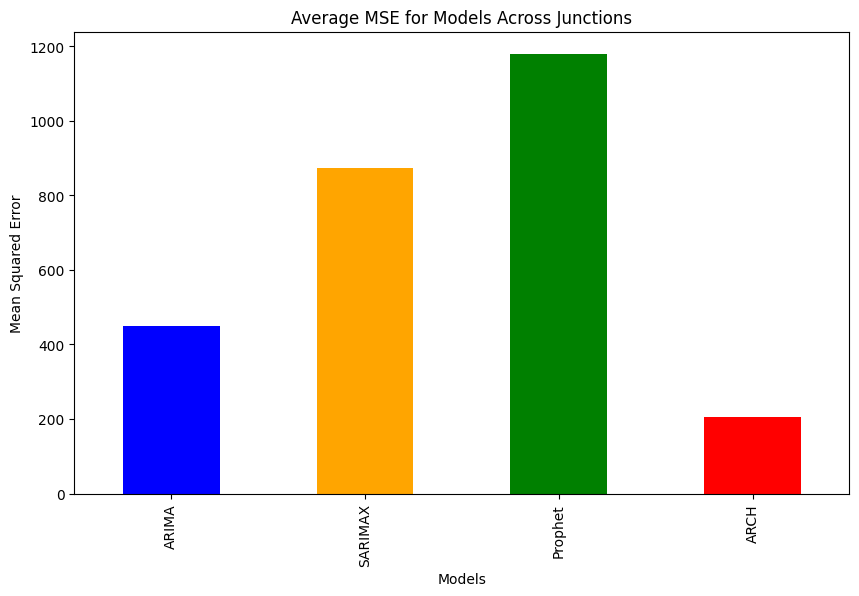

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from prophet import Prophet
from arch import arch_model

data.rename(columns={'DateTime': 'ds', 'Vehicles': 'y'}, inplace=True)

arima_predicted = {}
sarimax_predicted = {}
prophet_predicted = {}
arch_predicted = {}

junctions = data['Junction'].unique()

for junction in junctions:
    junction_data = data[data['Junction'] == junction].set_index('ds')
    actual_values = junction_data['y'].values


    arima_model = ARIMA(junction_data['y'], order=(1, 1, 1)).fit()
    arima_forecast = arima_model.forecast(steps=len(actual_values))
    arima_predicted[junction] = arima_forecast


    sarimax_model = SARIMAX(junction_data['y'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 24)).fit()
    sarimax_forecast = sarimax_model.forecast(steps=len(actual_values))
    sarimax_predicted[junction] = sarimax_forecast

    prophet_data = data[data['Junction'] == junction][['ds', 'y']]
    prophet_model = Prophet()
    prophet_model.fit(prophet_data)
    future = prophet_model.make_future_dataframe(periods=len(actual_values), freq='H')
    prophet_forecast = prophet_model.predict(future)
    prophet_predicted[junction] = prophet_forecast['yhat'].values[-len(actual_values):]

    arch_model_fitted = arch_model(junction_data['y'], vol='Garch', p=1, q=1).fit()
    arch_forecast = arch_model_fitted.forecast(horizon=len(actual_values))
    arch_predicted[junction] = arch_forecast.mean.iloc[-1].values

comparison_data = {}

for model_name in ['ARIMA', 'SARIMAX', 'Prophet', 'ARCH']:
    comparison_data[model_name] = {}
    for junction in junctions:
        actual_values = data[data['Junction'] == junction]['y'].values

        if model_name == 'ARIMA':
            predicted_values = arima_predicted[junction]
        elif model_name == 'SARIMAX':
            predicted_values = sarimax_predicted[junction]
        elif model_name == 'Prophet':
            predicted_values = prophet_predicted[junction]
        elif model_name == 'ARCH':
            predicted_values = arch_predicted[junction]


        mse = mean_squared_error(actual_values, predicted_values)
        comparison_data[model_name][junction] = mse

comparison_df = pd.DataFrame(comparison_data)


plt.figure(figsize=(10, 6))
comparison_df.mean().plot(kind='bar', color=['blue', 'orange', 'green', 'red'])
plt.title("Average MSE for Models Across Junctions")
plt.ylabel("Mean Squared Error")
plt.xlabel("Models")
plt.show()




# **RMSE CALCULATION ACTUAL AND PREDICTED**

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dat

Iteration:      1,   Func. Count:      6,   Neg. LLF: 29875597.87641631
Iteration:      2,   Func. Count:     12,   Neg. LLF: 62885.06196458762
Iteration:      3,   Func. Count:     18,   Neg. LLF: 108394.01869092125
Iteration:      4,   Func. Count:     26,   Neg. LLF: 61606.71377676148
Iteration:      5,   Func. Count:     32,   Neg. LLF: 102451.23035248039
Iteration:      6,   Func. Count:     38,   Neg. LLF: 60501.45964773817
Iteration:      7,   Func. Count:     43,   Neg. LLF: 60808.18766000353
Iteration:      8,   Func. Count:     49,   Neg. LLF: 60524.688765774496
Iteration:      9,   Func. Count:     55,   Neg. LLF: 60473.23011310863
Iteration:     10,   Func. Count:     60,   Neg. LLF: 60465.13564036216
Iteration:     11,   Func. Count:     65,   Neg. LLF: 60465.10936560607
Iteration:     12,   Func. Count:     70,   Neg. LLF: 60465.10856803618
Iteration:     13,   Func. Count:     75,   Neg. LLF: 60465.108563799266
Iteration:     14,   Func. Count:     79,   Neg. LLF: 60465.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dat

Iteration:      1,   Func. Count:      6,   Neg. LLF: 129495121687350.69
Iteration:      2,   Func. Count:     14,   Neg. LLF: 700331112.8367574
Iteration:      3,   Func. Count:     21,   Neg. LLF: 98190.44983451221
Iteration:      4,   Func. Count:     29,   Neg. LLF: 45661.00125329031
Iteration:      5,   Func. Count:     35,   Neg. LLF: 61053.48878058899
Iteration:      6,   Func. Count:     42,   Neg. LLF: 45182.78972188331
Iteration:      7,   Func. Count:     48,   Neg. LLF: 44577.52477672873
Iteration:      8,   Func. Count:     54,   Neg. LLF: 44124.802828573425
Iteration:      9,   Func. Count:     59,   Neg. LLF: 44122.87446904142
Iteration:     10,   Func. Count:     64,   Neg. LLF: 44120.68254027759
Iteration:     11,   Func. Count:     69,   Neg. LLF: 44120.06091569136
Iteration:     12,   Func. Count:     74,   Neg. LLF: 44119.44321958092
Iteration:     13,   Func. Count:     79,   Neg. LLF: 44119.19777018897
Iteration:     14,   Func. Count:     84,   Neg. LLF: 44119.14

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dat

Iteration:      1,   Func. Count:      6,   Neg. LLF: 115073.22389970167
Iteration:      2,   Func. Count:     16,   Neg. LLF: 78737.3891117076
Iteration:      3,   Func. Count:     22,   Neg. LLF: 49006.25701938687
Iteration:      4,   Func. Count:     27,   Neg. LLF: 48382.4705619326
Iteration:      5,   Func. Count:     32,   Neg. LLF: 48337.33255726154
Iteration:      6,   Func. Count:     37,   Neg. LLF: 48247.39975064568
Iteration:      7,   Func. Count:     42,   Neg. LLF: 48221.86864799852
Iteration:      8,   Func. Count:     48,   Neg. LLF: 48181.93695611312
Iteration:      9,   Func. Count:     53,   Neg. LLF: 48181.49254388682
Iteration:     10,   Func. Count:     58,   Neg. LLF: 48181.48277154802
Iteration:     11,   Func. Count:     63,   Neg. LLF: 48181.482136513034
Iteration:     12,   Func. Count:     67,   Neg. LLF: 48181.48213456241
Optimization terminated successfully    (Exit mode 0)
            Current function value: 48181.482136513034
            Iterations: 12


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dat

Iteration:      1,   Func. Count:      6,   Neg. LLF: 29570.46815459175
Iteration:      2,   Func. Count:     15,   Neg. LLF: 3193750901.294353
Iteration:      3,   Func. Count:     22,   Neg. LLF: 11751.106736344786
Iteration:      4,   Func. Count:     28,   Neg. LLF: 11245.953058857867
Iteration:      5,   Func. Count:     34,   Neg. LLF: 11175.355332657688
Iteration:      6,   Func. Count:     39,   Neg. LLF: 11176.470366681759
Iteration:      7,   Func. Count:     45,   Neg. LLF: 11174.999197586574
Iteration:      8,   Func. Count:     51,   Neg. LLF: 11174.862052573772
Iteration:      9,   Func. Count:     56,   Neg. LLF: 11174.861510422492
Iteration:     10,   Func. Count:     61,   Neg. LLF: 11174.861464111005
Iteration:     11,   Func. Count:     66,   Neg. LLF: 11174.861462642077
Iteration:     12,   Func. Count:     70,   Neg. LLF: 11174.861462642059
Optimization terminated successfully    (Exit mode 0)
            Current function value: 11174.861462642077
            Itera

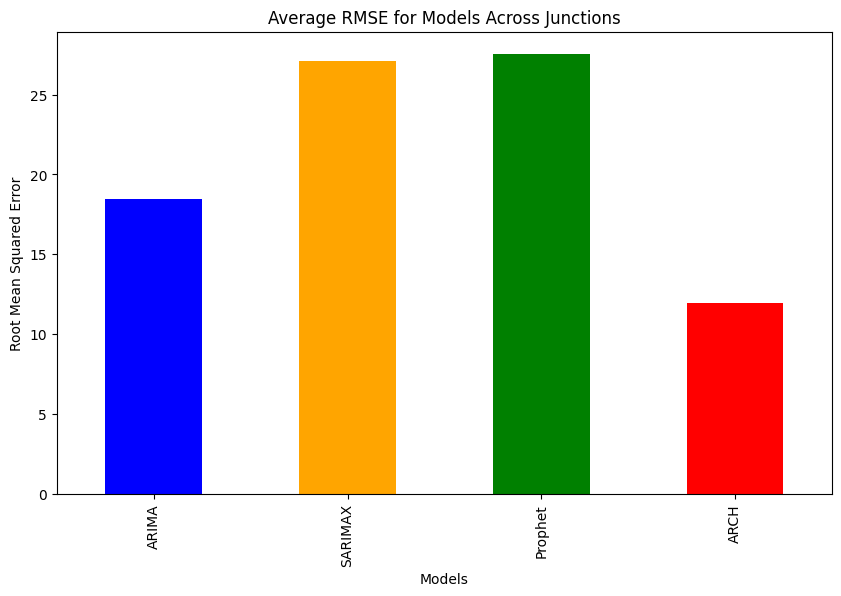

In [ ]:


def calculate_rmse(actual, predicted):
    return np.sqrt(mean_squared_error(actual, predicted))


rmse_scores = {}

for junction in junctions:
    junction_data = data[data['Junction'] == junction].set_index('ds')
    actual_values = junction_data['y'].values

    # ARIMA RMSE
    arima_model = ARIMA(junction_data['y'], order=(1, 1, 1)).fit()
    arima_forecast = arima_model.forecast(steps=len(actual_values))
    rmse_arima = calculate_rmse(actual_values, arima_forecast)

    # SARIMAX RMSE
    sarimax_model = SARIMAX(junction_data['y'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 24)).fit()
    sarimax_forecast = sarimax_model.forecast(steps=len(actual_values))
    rmse_sarimax = calculate_rmse(actual_values, sarimax_forecast)

    # Prophet RMSE
    prophet_data = data[data['Junction'] == junction][['ds', 'y']]
    prophet_model = Prophet()
    prophet_model.fit(prophet_data)
    future = prophet_model.make_future_dataframe(periods=len(actual_values), freq='H')
    prophet_forecast = prophet_model.predict(future)
    rmse_prophet = calculate_rmse(actual_values, prophet_forecast['yhat'].values[-len(actual_values):])

    # ARCH RMSE
    arch_model_fitted = arch_model(junction_data['y'], vol='Garch', p=1, q=1).fit()
    arch_forecast = arch_model_fitted.forecast(horizon=len(actual_values))
    rmse_arch = calculate_rmse(actual_values, arch_forecast.mean.iloc[-1].values)


    rmse_scores[junction] = {
        'ARIMA': rmse_arima,
        'SARIMAX': rmse_sarimax,
        'Prophet': rmse_prophet,
        'ARCH': rmse_arch
    }

rmse_df = pd.DataFrame(rmse_scores)
rmse_df = rmse_df.transpose()

plt.figure(figsize=(10, 6))
rmse_df.mean().plot(kind='bar', color=['blue', 'orange', 'green', 'red'])
plt.title("Average RMSE for Models Across Junctions")
plt.ylabel("Root Mean Squared Error")
plt.xlabel("Models")
plt.show()

In [ ]:

comparison_table = {}
for junction in junctions:
    junction_data = data[data['Junction'] == junction].set_index('ds')
    actual_values = junction_data['y'].values
    comparison_table[junction] = {'Actual': actual_values}

    # ARIMA
    comparison_table[junction]['ARIMA'] = arima_predicted[junction]

    # SARIMAX
    comparison_table[junction]['SARIMAX'] = sarimax_predicted[junction]

    # Prophet
    comparison_table[junction]['Prophet'] = prophet_predicted[junction]

    # ARCH
    comparison_table[junction]['ARCH'] = arch_predicted[junction]


for junction in comparison_table:
    print(f"Junction: {junction}")
    df = pd.DataFrame(comparison_table[junction])
    print(df)
    print("\n")

Junction: 1
                     Actual      ARIMA    SARIMAX     Prophet       ARCH
2017-07-01 00:00:00      13  75.917577  71.603801   70.999038  35.783971
2017-07-01 01:00:00      10  74.682005  60.449892   64.825689  35.783971
2017-07-01 02:00:00       7  73.948899  50.847796   58.602235  35.783971
2017-07-01 03:00:00       9  73.513923  43.216728   53.332036  35.783971
2017-07-01 04:00:00       6  73.255836  36.790040   49.633026  35.783971
...                     ...        ...        ...         ...        ...
2019-02-28 18:00:00     105  72.879284  72.121392  151.802185  35.783971
2019-02-28 19:00:00      96  72.879284  75.432336  152.810080  35.783971
2019-02-28 20:00:00      90  72.879284  72.391730  152.532367  35.783971
2019-02-28 21:00:00      84  72.879284  65.567061  151.144673  35.783971
2019-02-28 22:00:00      78  72.879284  61.466445  148.773517  35.783971

[14591 rows x 5 columns]


Junction: 2
                     Actual      ARIMA    SARIMAX    Prophet       ARCH


##Model Analysis

**ARIMA**: Performed moderately well but struggled with capturing seasonality and sudden changes, leading to higher errors.

**SARIMAX:** Improved over ARIMA by modeling seasonality but still produced higher errors for most junctions compared to other models.

**Prophet**: Excelled in capturing trends and seasonality, performing second best for Junction 3, where periodic patterns were prominent.

**ARCH**: Consistently delivered the best performance for Junctions 1, 2, and 4, effectively handling traffic variability and achieving the lowest errors.



#Conclusion:

##Best Model: ARCH, as it provided the most accurate forecasts overall
Best Model Overall:

**ARCH** performed best for Junctions 1, 2, and 4, achieving the lowest Root Mean Squared Error (RMSE). Its strength lies in effectively handling traffic variability and providing consistent predictions.

**Prophet** was the best for Junction 3, excelling in capturing its strong seasonality and non-linear trends.

Junctions 1, 2, and 4 exhibited higher traffic variability, making ARCH the most suitable model due to its ability to model volatility.

Junction 3 had more stable traffic patterns with prominent seasonality and trends, aligning better with Prophet’s strengths.